# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color:rgb(53, 0, 138); text-align: center; line-height: 1.25;"><b>💊🩺 Hypertension<span style="color: #000000"> EDA & Prediction 🔮</span></b><br><span style="color:rgb(92, 152, 255); font-size: 24px">with Various Machine Learning Models </span></h1>
<hr>
​

# <div style="font-family: Trebuchet MS; background-color:rgb(53, 0, 138); color: #FFFFFF; padding: 12px; line-height: 1.5;">1. | Introduction 👋</div>

<center>
    <img src = "https://www.bostonrockgym.com/wp-content/uploads/2023/04/Blood-Pressure.gif" alt = "Hypertension"
     width = "80%">
</center>

# <div style="font-family: Trebuchet MS; background-color:rgb(53, 0, 138); color: #FFFFFF; padding: 12px; line-height: 1.5;">2. | Importing Libraries 📚</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Importing libraries</b> that will be used in this notebook.
</div>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pickle
import joblib

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , roc_curve,recall_score,precision_score,r2_score,f1_score
from sklearn.tree import plot_tree
from sklearn.neural_network import MLPClassifier
import plotly.graph_objects as go 
# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100

# <div style="font-family: Trebuchet MS; background-color: rgb(53, 0, 138); color: #FFFFFF; padding: 12px; line-height: 1.5;">3. | Reading Dataset 👓</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 After importing libraries, <b>the dataset that will be used will be imported</b>.
</div>


In [2]:
# --- Importing Dataset ---
df = pd.read_csv(r"E:\AI & Data_Science\DEPI\Datahypertension(26k,14).csv")

# --- Reading Dataset ---
df.head().style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'})

In [3]:
# --- Print Dataset Info ---
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', df.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
df.info(memory_usage = False)

.: Dataset Info :.
******************************
Total Rows: 26083
Total Columns: 14
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)

In [4]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64


In [5]:
df.describe().T.style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'})

In [6]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [7]:
df['sex'].fillna(df['sex'].mode()[0],inplace = True)

## <div style="font-family: Trebuchet MS; background-color: rgb(53, 0, 138); color: #FFFFFF; padding: 12px; line-height: 1.5;"> Numerical Features 🔢</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The second variable that will be explored is <b>numerical variable</b>.
</div>

In [8]:
numerical_features = df[['age','trestbps','chol','thalach','oldpeak']]
numerical_features.head().style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'})

### <div style="font-family: Trebuchet MS; background-color:rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;"> Continuous Column Distribution 📈</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will show the <b>distribution of numerical variables</b> in histograms, boxplots, Q-Q Plots, skewness and kurtosis values.
</div>

.: Age Column Skewness & Kurtosis :.
****************************************
Skewness: -0.040
Kurtosis: -0.736




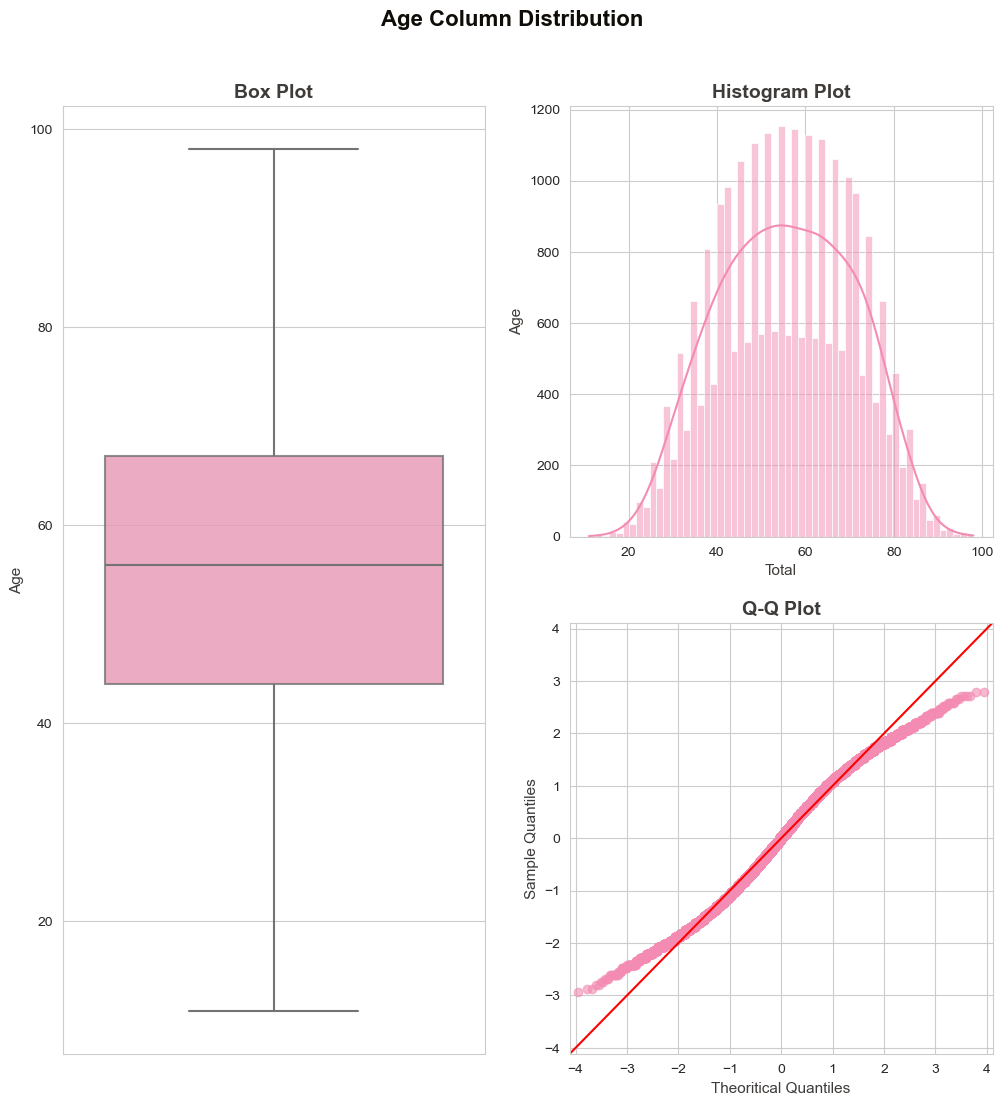

In [9]:
# --- Variable, Color & Plot Size ---
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

var = 'age'
color = color_mix[0]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Age Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Age Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

#--- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])


plt.show()

#### <h4 style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;">  trestbps (Resting Blood Pressure in mm Hg) </h4>

.: Resting Blood Pressure Column Skewness & Kurtosis :.
*******************************************************
Skewness: 0.723
Kurtosis: 0.921




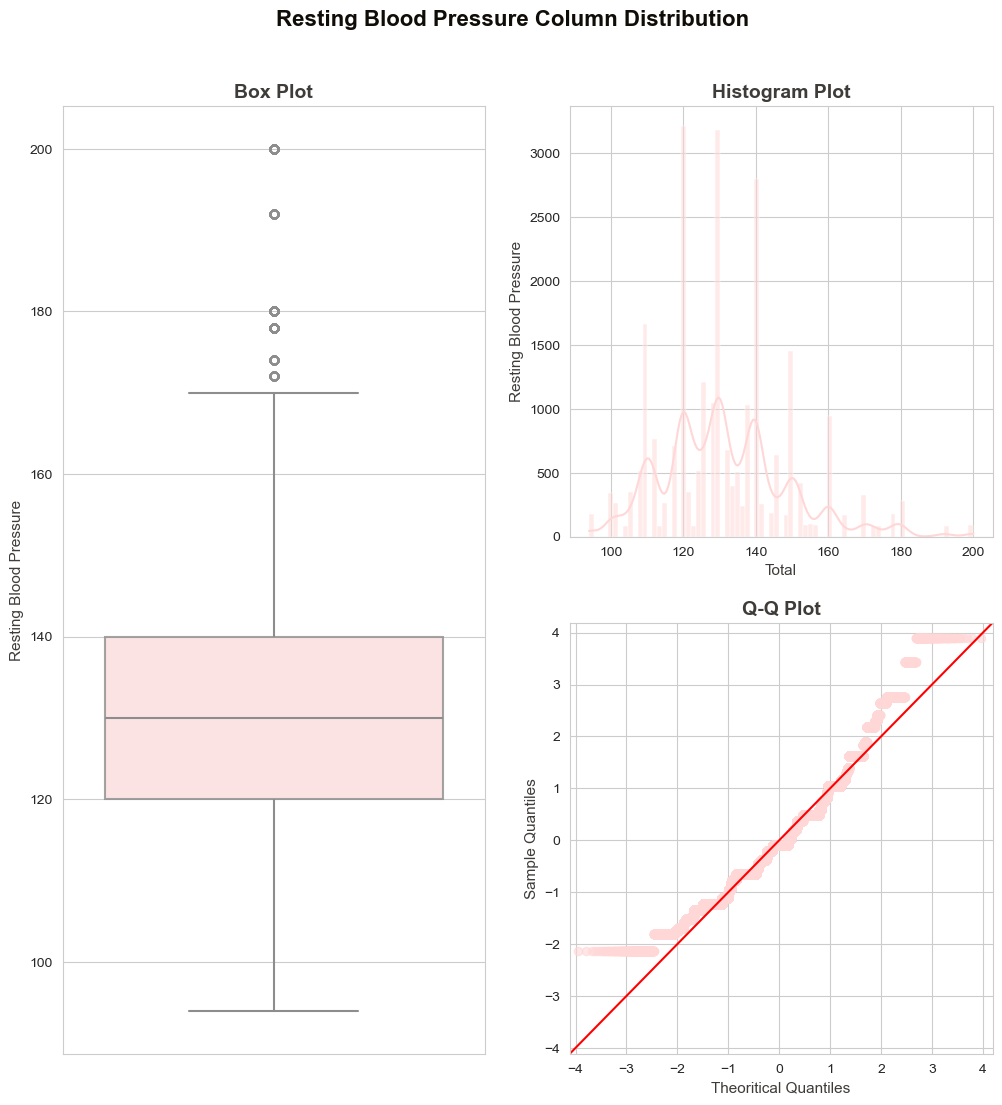

In [10]:
# --- Variable, Color & Plot Size ---
var = 'trestbps'
color = color_mix[2]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Resting Blood Pressure Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 55)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Resting Blood Pressure Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

#### <h4 style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;">  chol (Serum Cholestoral in mg/dl) </h4>

.: Serum Cholestoral Column Skewness & Kurtosis :.
*********************************************
Skewness: 1.101
Kurtosis: 4.154




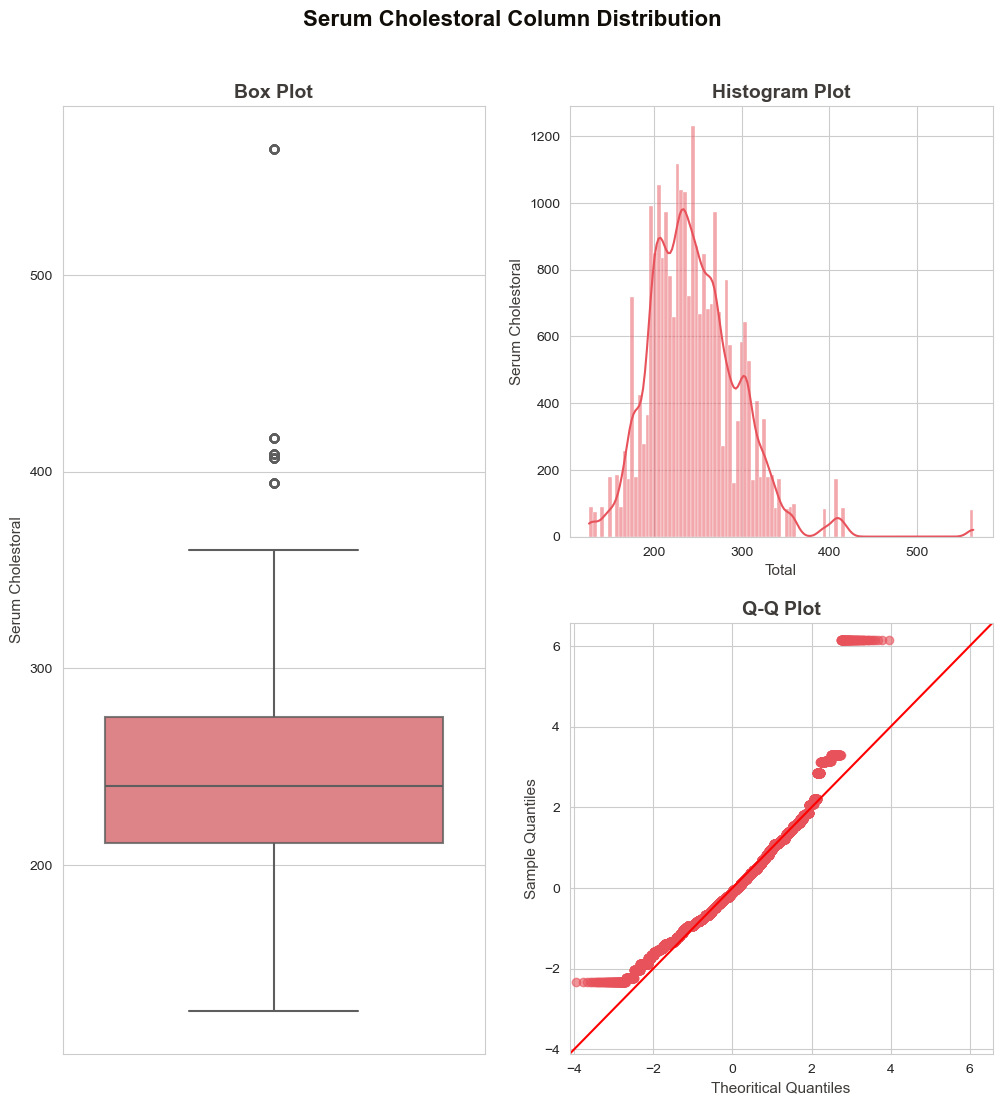

In [11]:
# --- Variable, Color & Plot Size ---
var = 'chol'
color = color_mix[4]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Serum Cholestoral Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 45)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Serum Cholestoral Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])
# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

#### <h4 style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;">  thalach (Maximum Heart Rate) </h4>

.: Maximum Heart Rate Column Skewness & Kurtosis :.
**************************************************
Skewness: -0.521
Kurtosis: -0.076




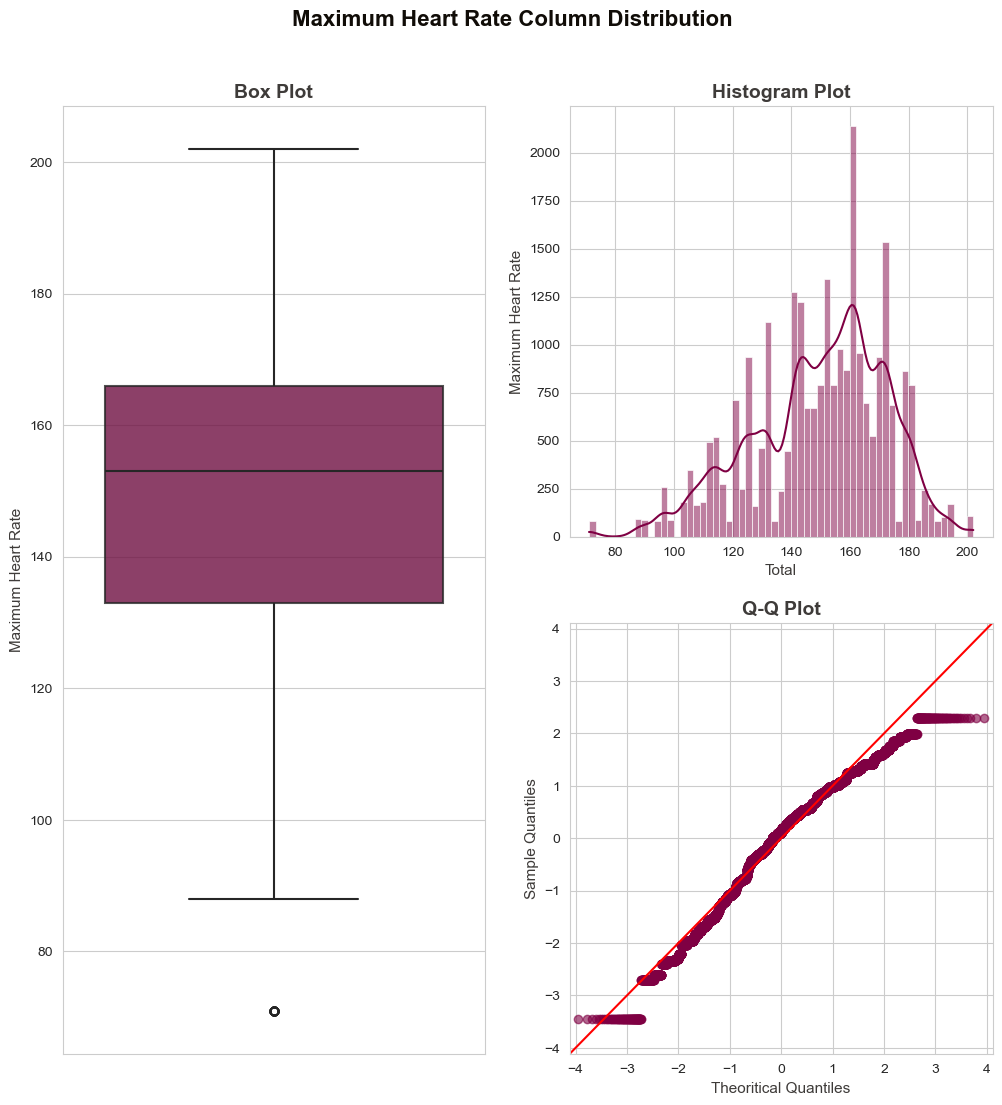

In [12]:
# --- Variable, Color & Plot Size ---
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']

var = 'thalach'
color = purple_grad[1]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Maximum Heart Rate Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 50)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Maximum Heart Rate Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

#### <h4 style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;"> oldpeak </h4>

.: "oldpeak" Column Skewness & Kurtosis :.
****************************************
Skewness: 1.266
Kurtosis: 1.525




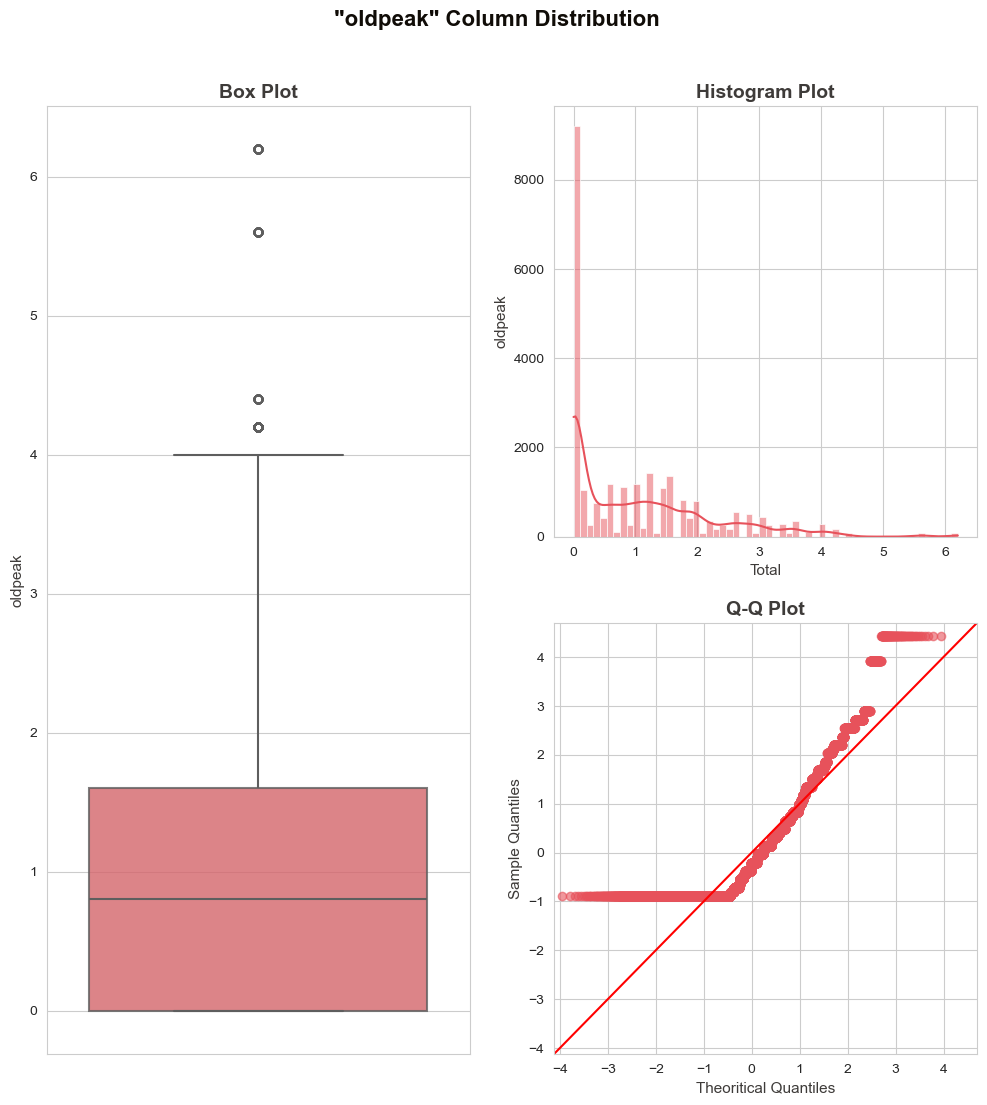

In [13]:
# --- Variable, Color & Plot Size ---

var = 'oldpeak'
color = color_mix[4]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: "oldpeak" Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('"oldpeak" Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('oldpeak', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color,
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('oldpeak', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

## <div style="font-family: Trebuchet MS; background-color: rgb(53, 0, 138); color: #FFFFFF; padding: 12px; line-height: 1.5;"> Categorical Features📝</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The second variable that will be explored is <b>categorical variable</b>.
</div>

### <div style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;">  sex (Gender)</div>

*************************
.: Sex (Gender) Total :.
*************************


sex
0.0    13054
1.0    13029
Name: count, dtype: int64

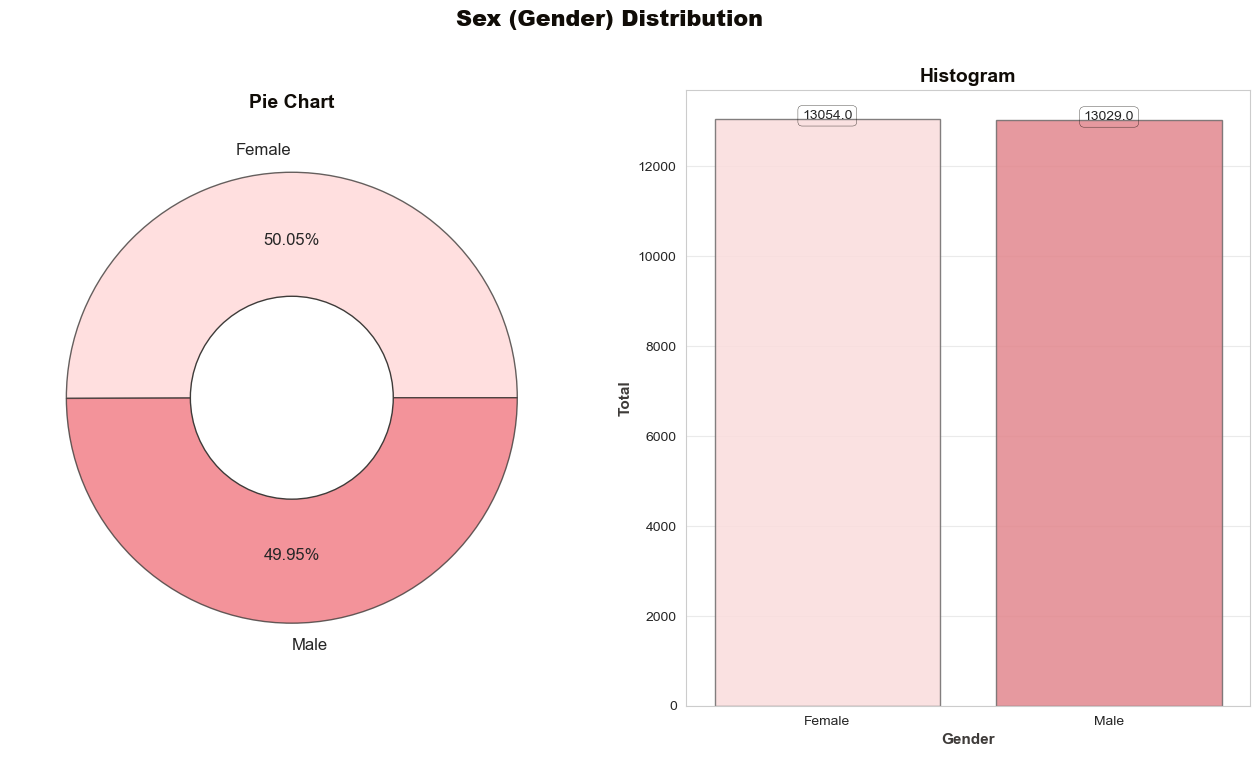

In [14]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[2:4]
labels=['Female', 'Male']
order=df['sex'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['sex'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='sex', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

print('*' * 25)
print('\033[1m'+'.: Sex (Gender) Total :.'+'\033[0m')
print('*' * 25)
df.sex.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;">  cp (Chest Pain Type)</div>

******************************
.: Chest Pain Type Total :.
******************************


cp
0    12314
2     7392
1     4456
3     1921
Name: count, dtype: int64

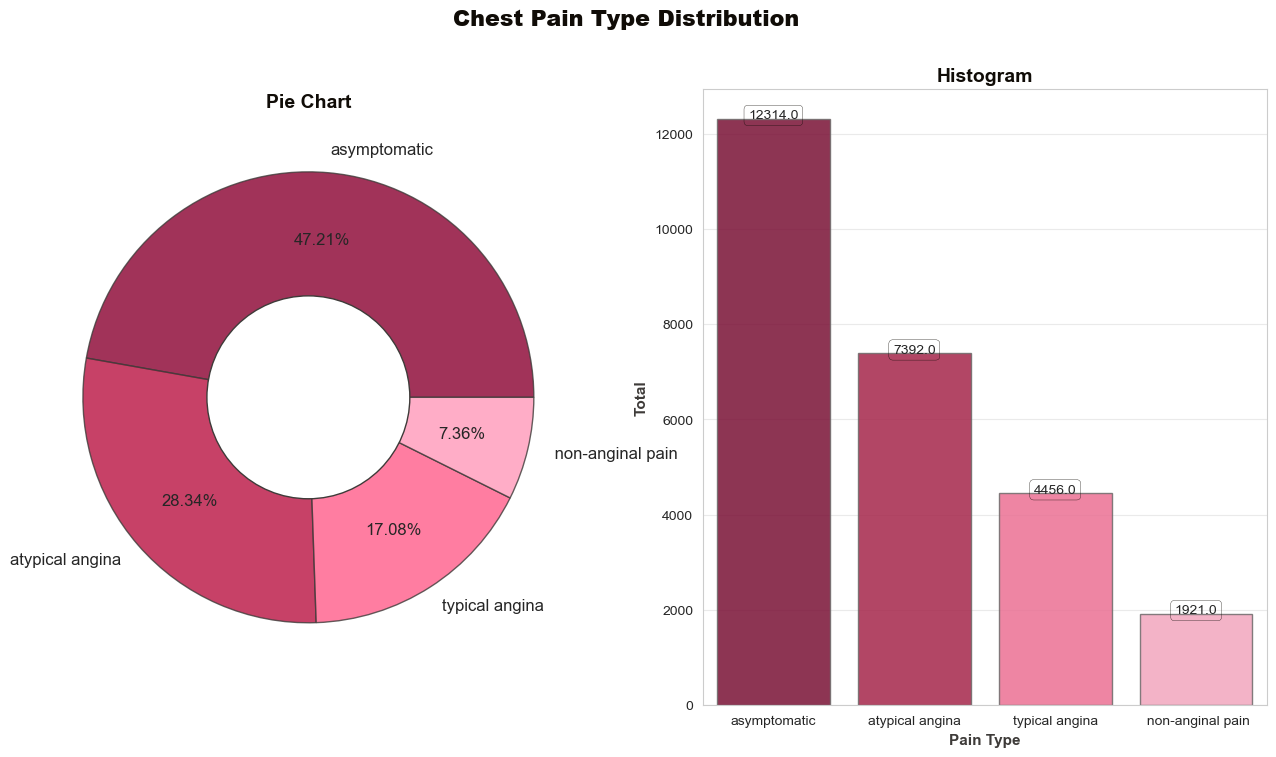

In [15]:
# --- Setting Colors, Labels, Order ---
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']

colors=pink_grad[0:4]
labels=['asymptomatic', 'atypical angina', 'typical angina', ' non-anginal pain']
order=df['cp'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Chest Pain Type Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['cp'].value_counts(), labels=labels, colors=colors, pctdistance=0.7, 
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]))
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='cp', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt


print('*' * 30)
print('\033[1m'+'.: Chest Pain Type Total :.'+'\033[0m')
print('*' * 30)
df.cp.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;">  fbs (Fasting Blood Sugar)</div>

********************************
.: Fasting Blood Sugar Total :.
********************************


fbs
0    22177
1     3906
Name: count, dtype: int64

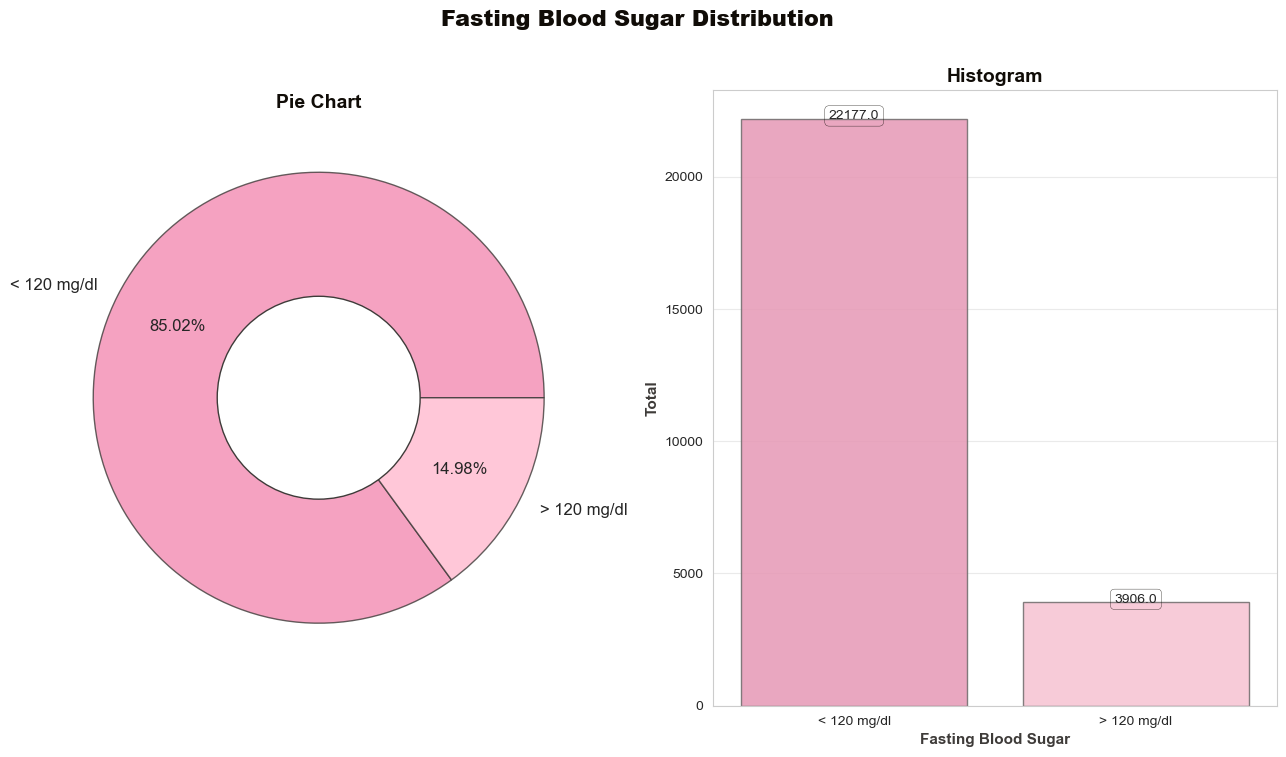

In [16]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[0:2]
labels=['< 120 mg/dl', '> 120 mg/dl']
order=df['fbs'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Fasting Blood Sugar Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['fbs'].value_counts(), labels=labels, colors=colors,
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='fbs', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Fasting Blood Sugar', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt



print('*' * 32)
print('\033[1m'+'.: Fasting Blood Sugar Total :.'+'\033[0m')
print('*' * 32)
df.fbs.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;">  restecg (Resting Electrocardiographic Results)</div>

**************************************************
.: Resting Electrocardiographic Results Total :.
**************************************************


restecg
1    13029
0    12702
2      352
Name: count, dtype: int64

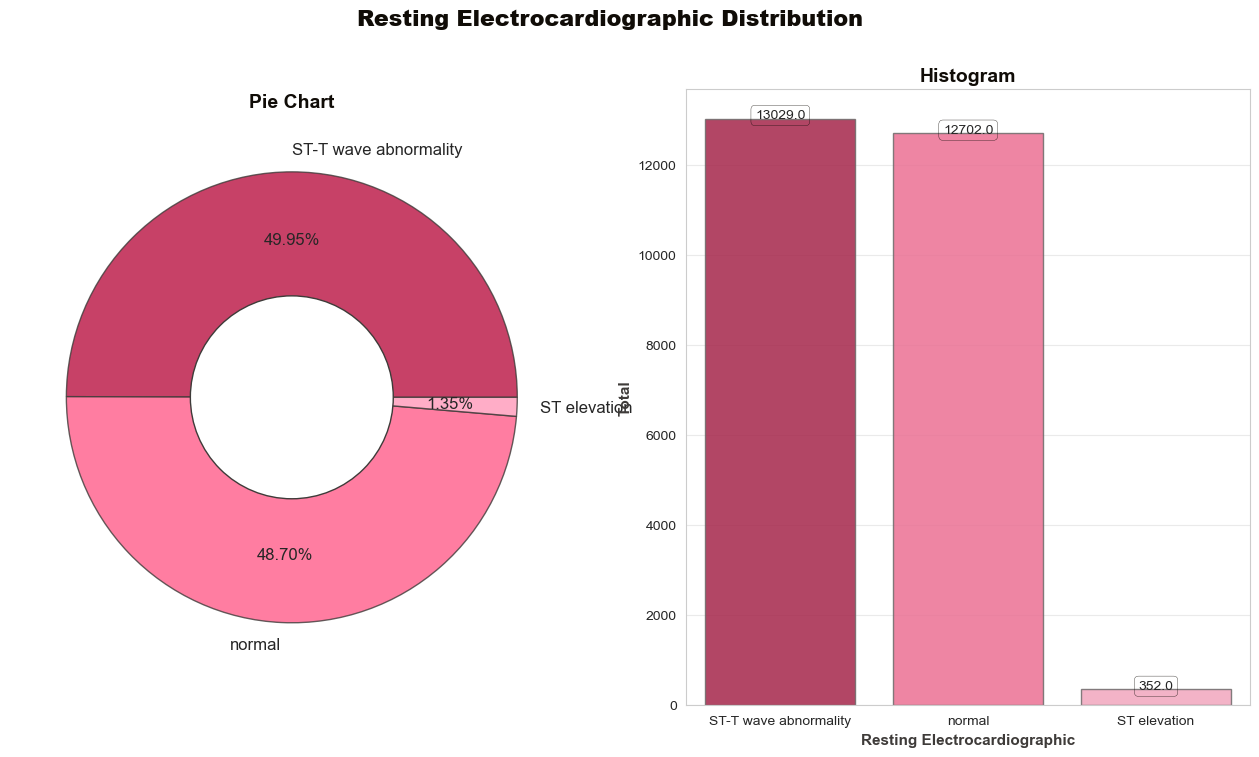

In [17]:
# --- Setting Colors, Labels, Order ---
colors=pink_grad[1:4]
labels=['ST-T wave abnormality', 'normal', 'ST elevation']
order=df['restecg'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Resting Electrocardiographic Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['restecg'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='restecg', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Resting Electrocardiographic', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0,1,2], labels)
plt.grid(axis='y', alpha=0.4)
countplt


print('*' * 50)
print('\033[1m'+'.: Resting Electrocardiographic Results Total :.'+'\033[0m')
print('*' * 50)
df.restecg.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;">  exang (Exercise Induced Angina)</div>

***********************************
.: Exercise Induced Angina Total :.
***********************************


exang
0    17565
1     8518
Name: count, dtype: int64

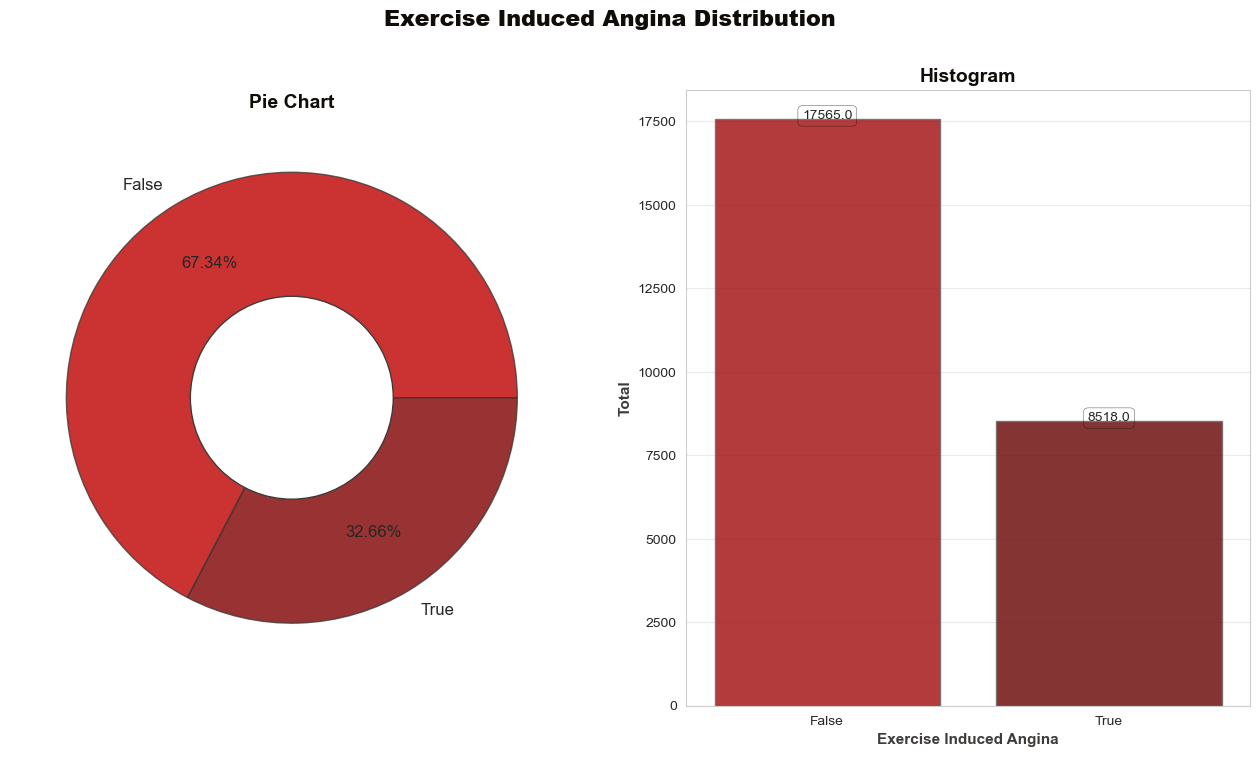

In [18]:
# --- Setting Colors, Labels, Order ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']

colors=red_grad[1:3]
labels=['False', 'True']
order=df['exang'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Exercise Induced Angina Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['exang'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='exang', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Exercise Induced Angina', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt


print('*' * 35)
print('\033[1m'+'.: Exercise Induced Angina Total :.'+'\033[0m')
print('*' * 35)
df.exang.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;">  slope (Slope of the Peak Exercise)</div>

********************
.: Slope Total :.
********************


slope
2    12267
1    11990
0     1826
Name: count, dtype: int64

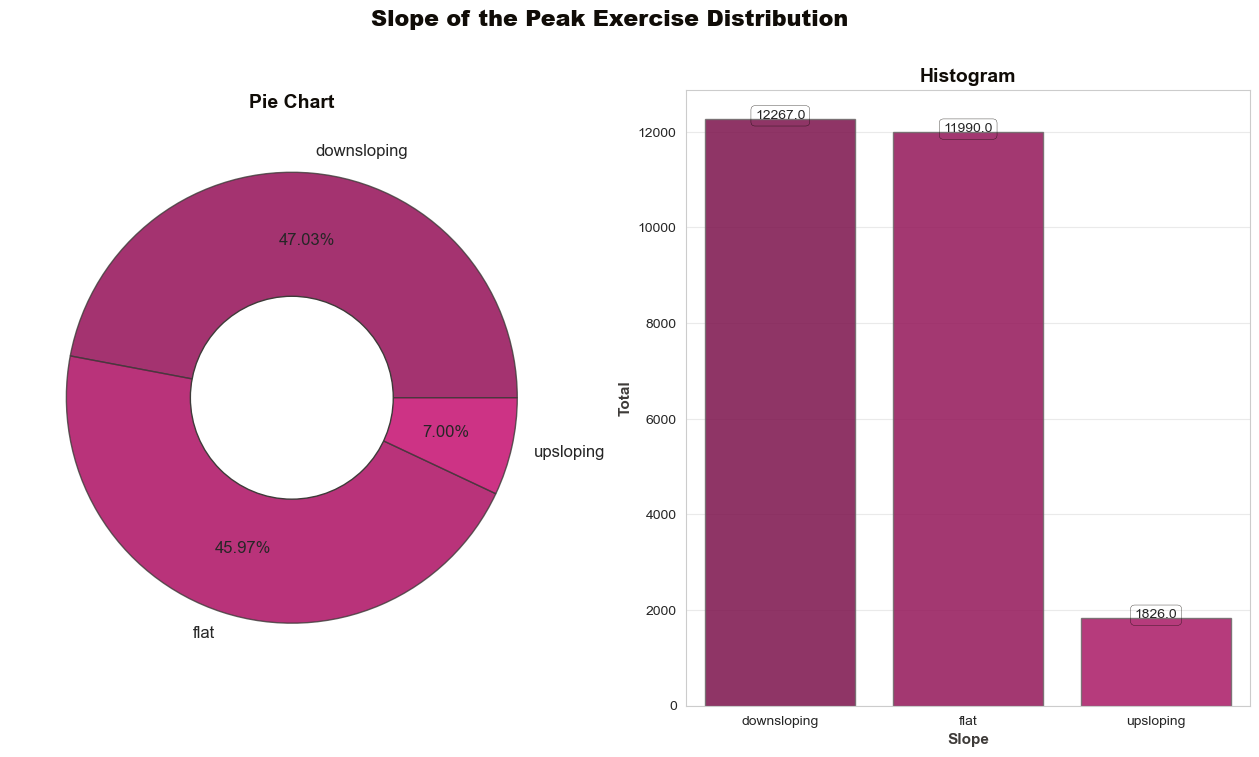

In [19]:
# --- Setting Colors, Labels, Order ---
colors=purple_grad[2:5]
labels=['downsloping', 'flat', 'upsloping']
order=df['slope'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Slope of the Peak Exercise Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['slope'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)


# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='slope', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Slope', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])  
plt.xticks([0, 1, 2], labels)
plt.grid(axis='y', alpha=0.4)
countplt

print('*' * 20)
print('\033[1m'+'.: Slope Total :.'+'\033[0m')
print('*' * 20)
df.slope.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;">  ca (Number of Major Vessels)</div>

****************************************
.: Number of Major Vessels Total :.
****************************************


ca
0    15146
1     5514
2     3323
3     1732
4      368
Name: count, dtype: int64

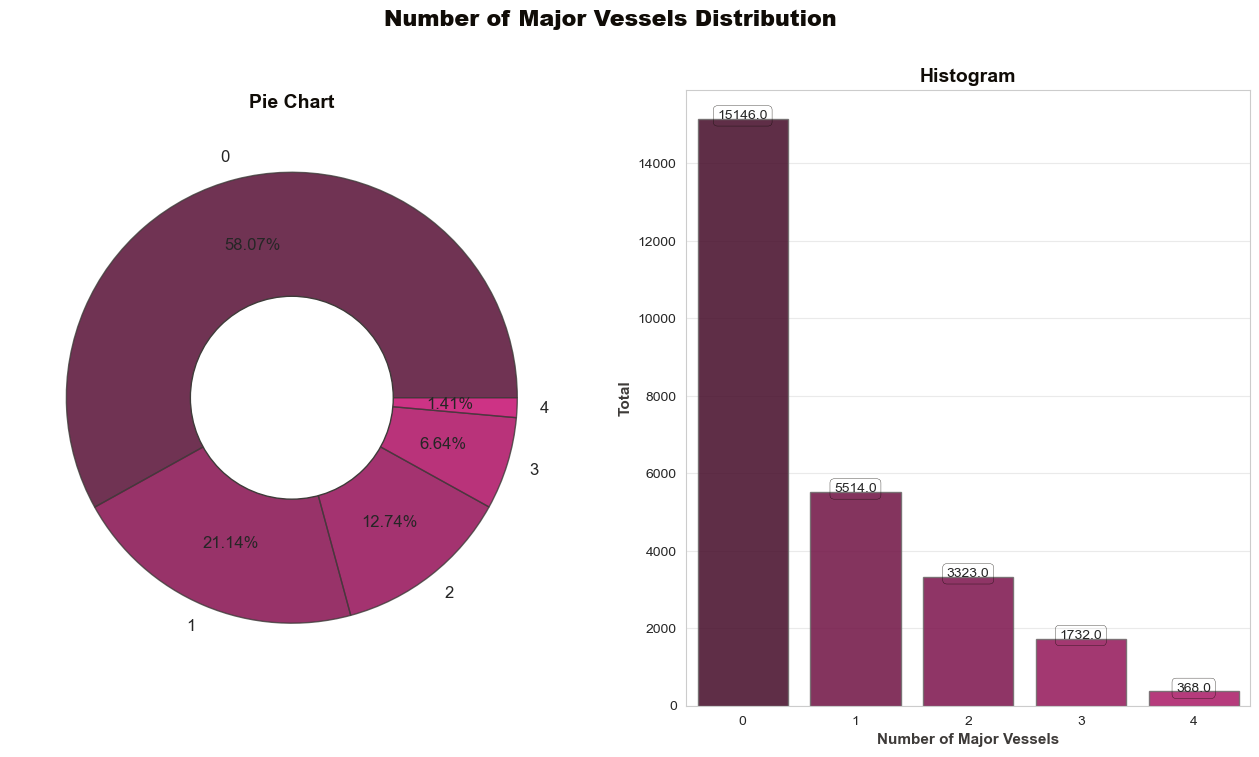

In [20]:
# --- Setting Colors, Labels, Order ---
colors=purple_grad
labels=['0', '1', '2', '3', '4']
order=df['ca'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Number of Major Vessels Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['ca'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='ca', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of Major Vessels', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1,2,3,4], labels)
plt.grid(axis='y', alpha=0.4)
countplt


print('*' * 40)
print('\033[1m'+'.: Number of Major Vessels Total :.'+'\033[0m')
print('*' * 40)
df.ca.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;"> thal</div>

********************
.: "thal" Total :.
********************


thal
2    14359
3    10096
1     1474
0      154
Name: count, dtype: int64

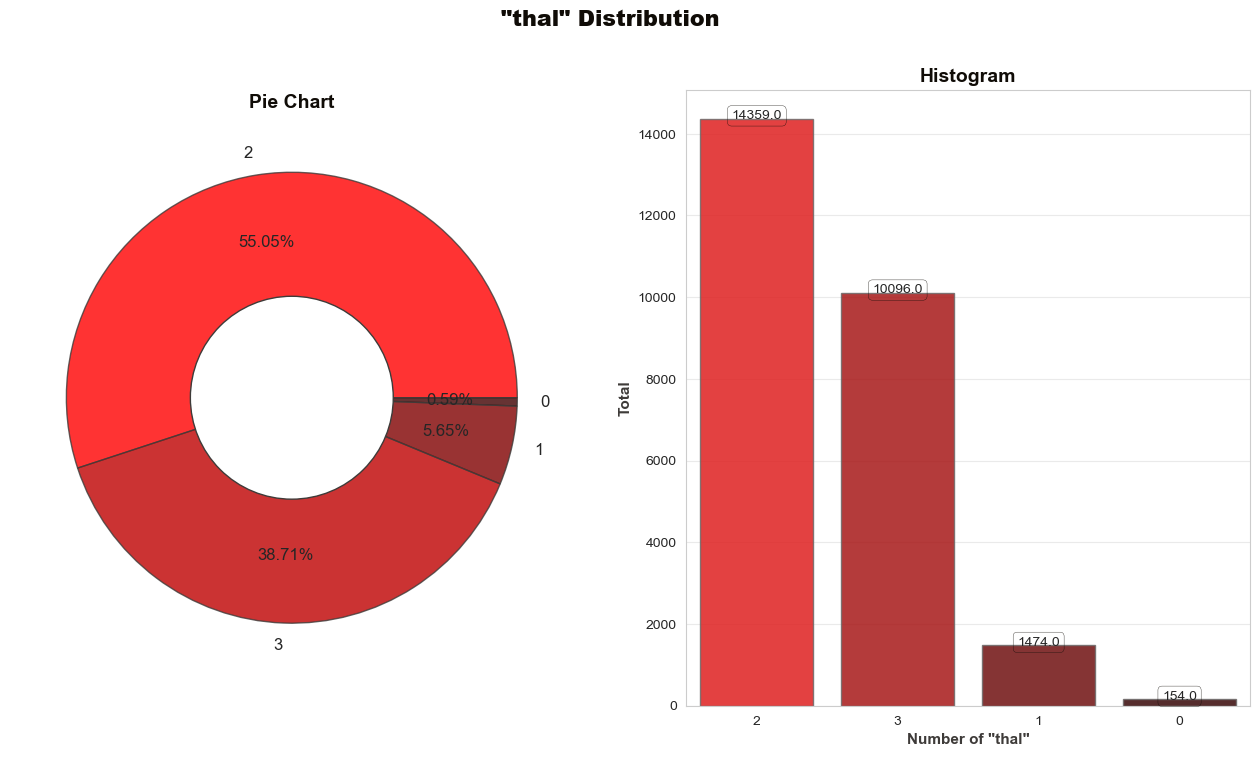

In [21]:
# --- Setting Colors, Labels, Order ---
colors=red_grad[0:4]
labels=['2', '3', '1', '0']
order=df['thal'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('"thal" Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['thal'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='thal', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of "thal"', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1,2,3], labels)
plt.grid(axis='y', alpha=0.4)
countplt                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
print('*' * 20)
print('\033[1m'+'.: "thal" Total :.'+'\033[0m')
print('*' * 20)
df.thal.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;"> target (Heart Diseases Status)</div>

*********************************************
.: Heart Diseases Status (target) Total :.
*********************************************


target
1    14274
0    11809
Name: count, dtype: int64

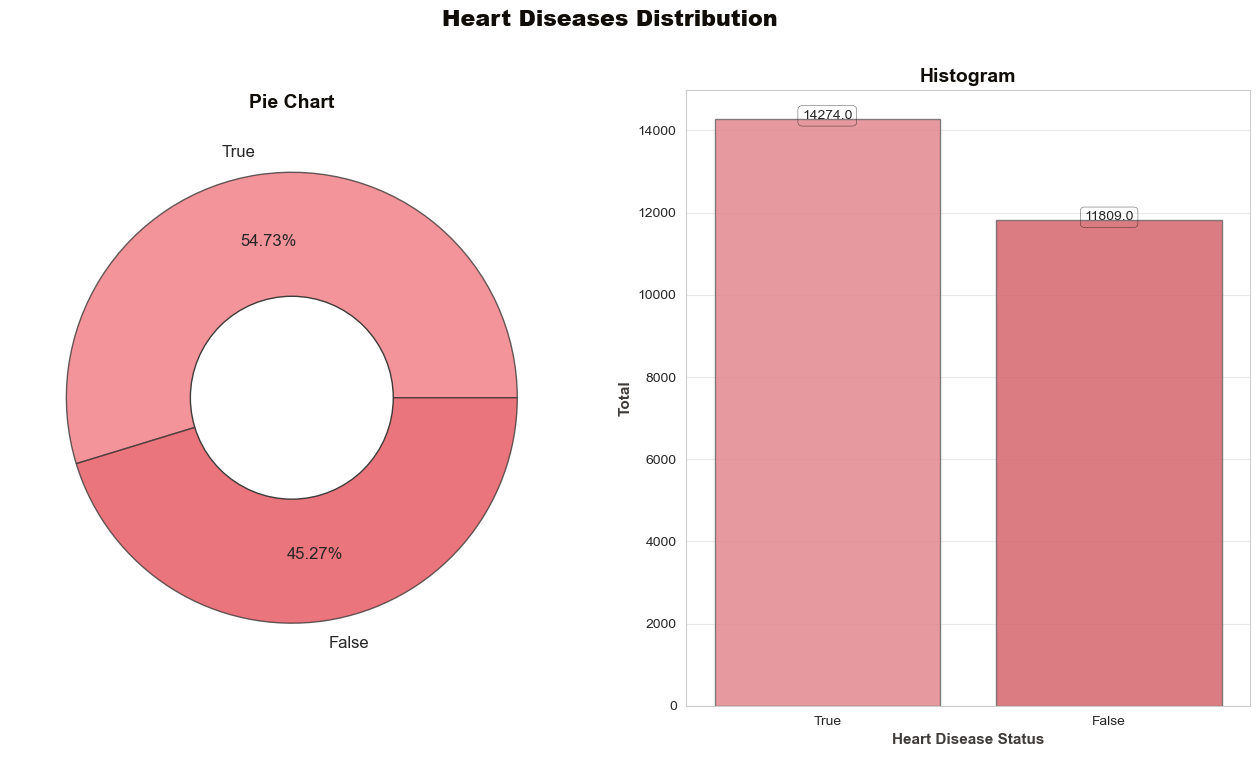

In [22]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[3:5]
labels=['True', 'False']
order=df['target'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('Heart Diseases Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['target'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='target', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Heart Disease Status', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

print('*' * 45)
print('\033[1m'+'.: Heart Diseases Status (target) Total :.'+'\033[0m')
print('*' * 45)
df.target.value_counts(dropna=False)

# <div style="font-family: Trebuchet MS; background-color: rgb(53, 0, 138) ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> EDA 📉</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will perform some <b>EDA</b> to get more insights about dataset.

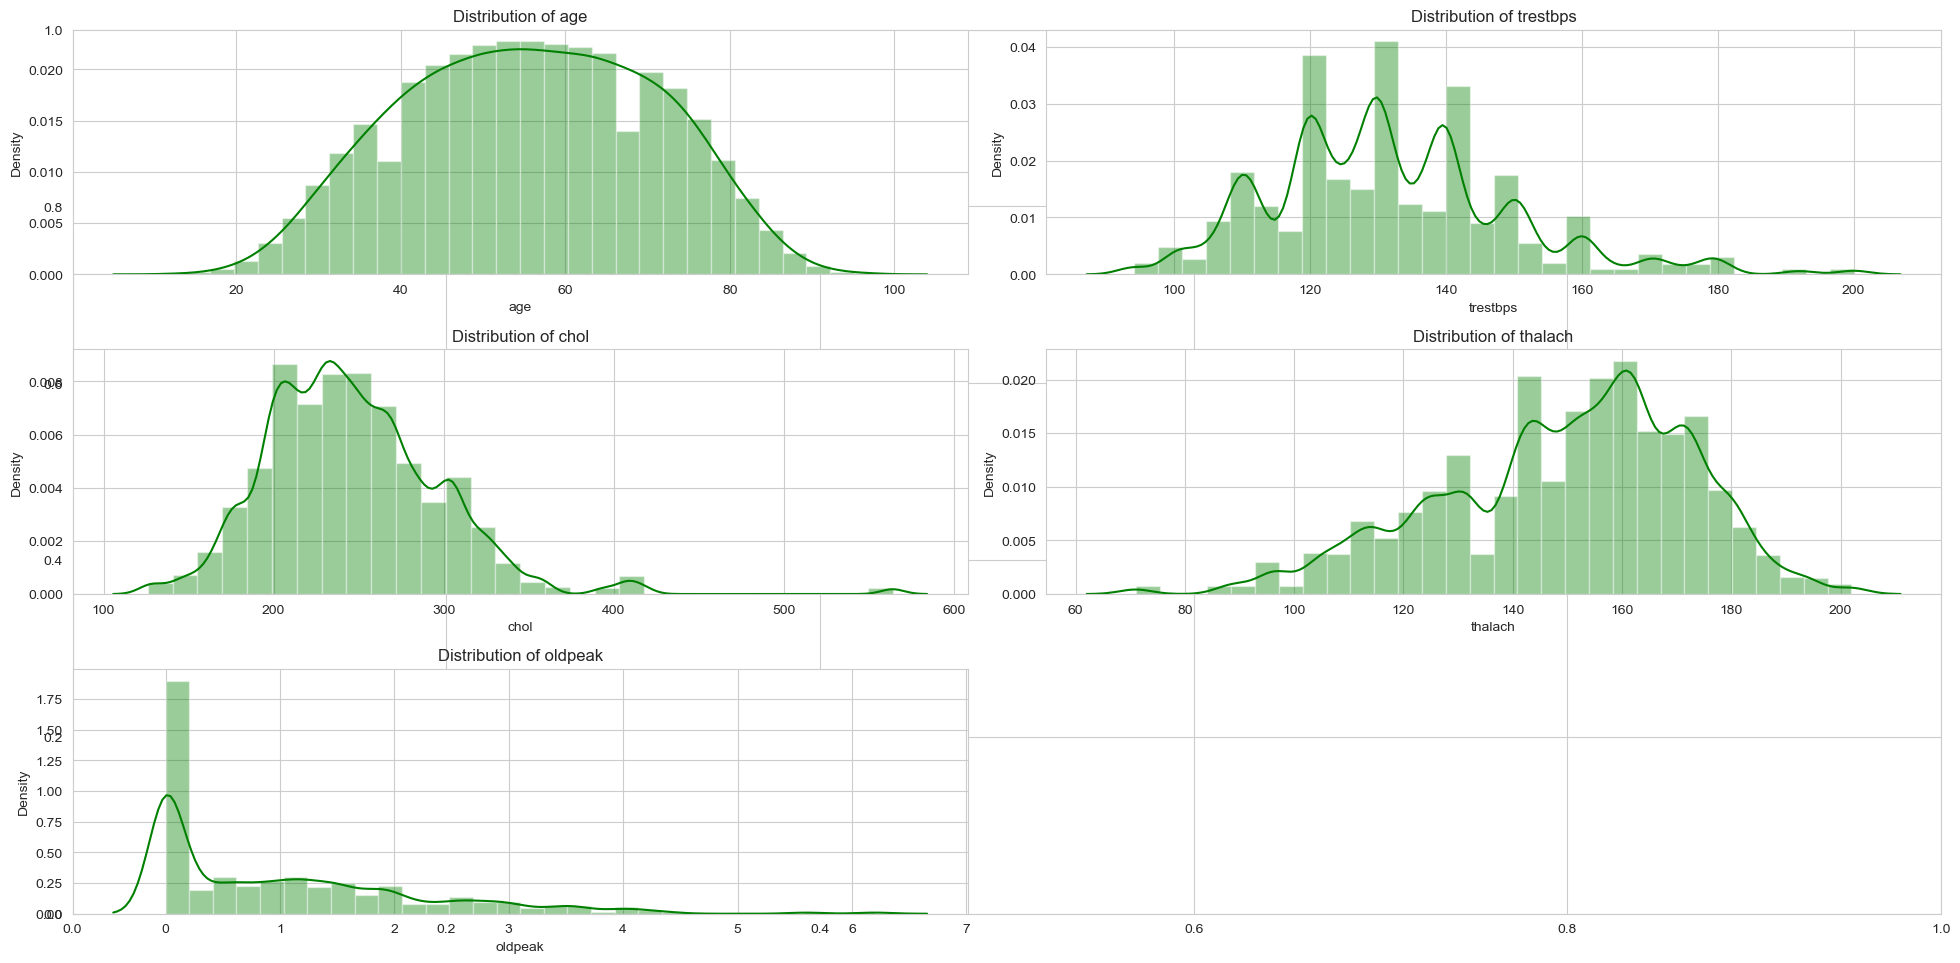

In [23]:
plt.subplots(figsize =(20,10))
for i, column in enumerate(numerical_features):
    plt.subplot(3,2,i+1)
    sns.distplot(df[column],bins = 30, color = 'g')
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

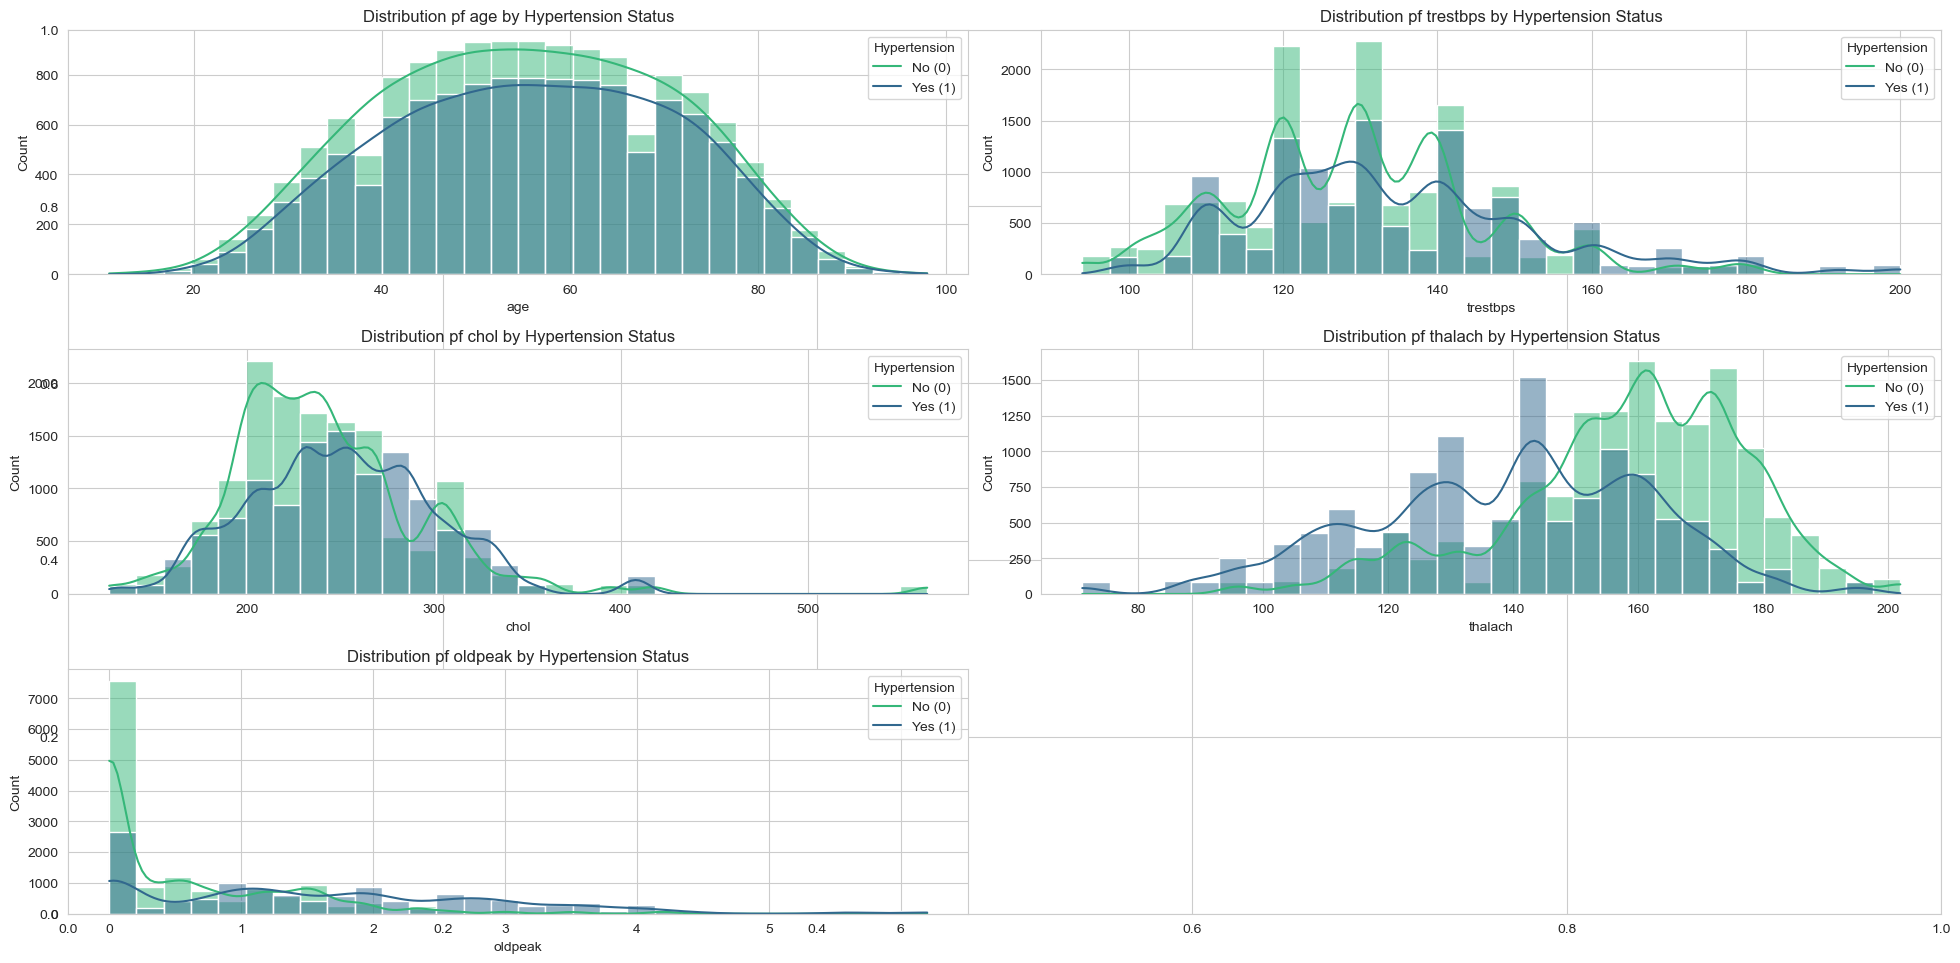

In [24]:
plt.subplots(figsize=(20,10))
for i,column in enumerate(numerical_features):
    plt.subplot(3,2,i+1)
    sns.histplot(data = df, x = column, hue = 'target', kde = True, palette = 'viridis',bins = 30)
    plt.title(f"Distribution pf {column} by Hypertension Status")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend(title = "Hypertension", labels = ["No (0)","Yes (1)"])

plt.tight_layout()
plt.show()

In [25]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [26]:
categorical_features = df[['sex','cp','fbs', 'restecg','exang','slope', 'ca', 'thal']]
categorical_features

sex  cp  fbs  restecg  exang  slope  ca  thal
0      1.0   3    1        0      0      0   0     1
1      0.0   2    0        1      0      0   0     2
2      1.0   1    0        0      0      2   0     2
3      0.0   1    0        1      0      2   0     2
4      0.0   0    0        1      1      2   0     2
...    ...  ..  ...      ...    ...    ...  ..   ...
26078  0.0   0    1        1      0      1   3     2
26079  1.0   0    0        0      1      1   0     3
26080  1.0   0    0        1      0      2   1     3
26081  1.0   1    0        0      0      2   1     2
26082  0.0   1    0        0      0      1   1     2

[26083 rows x 8 columns]

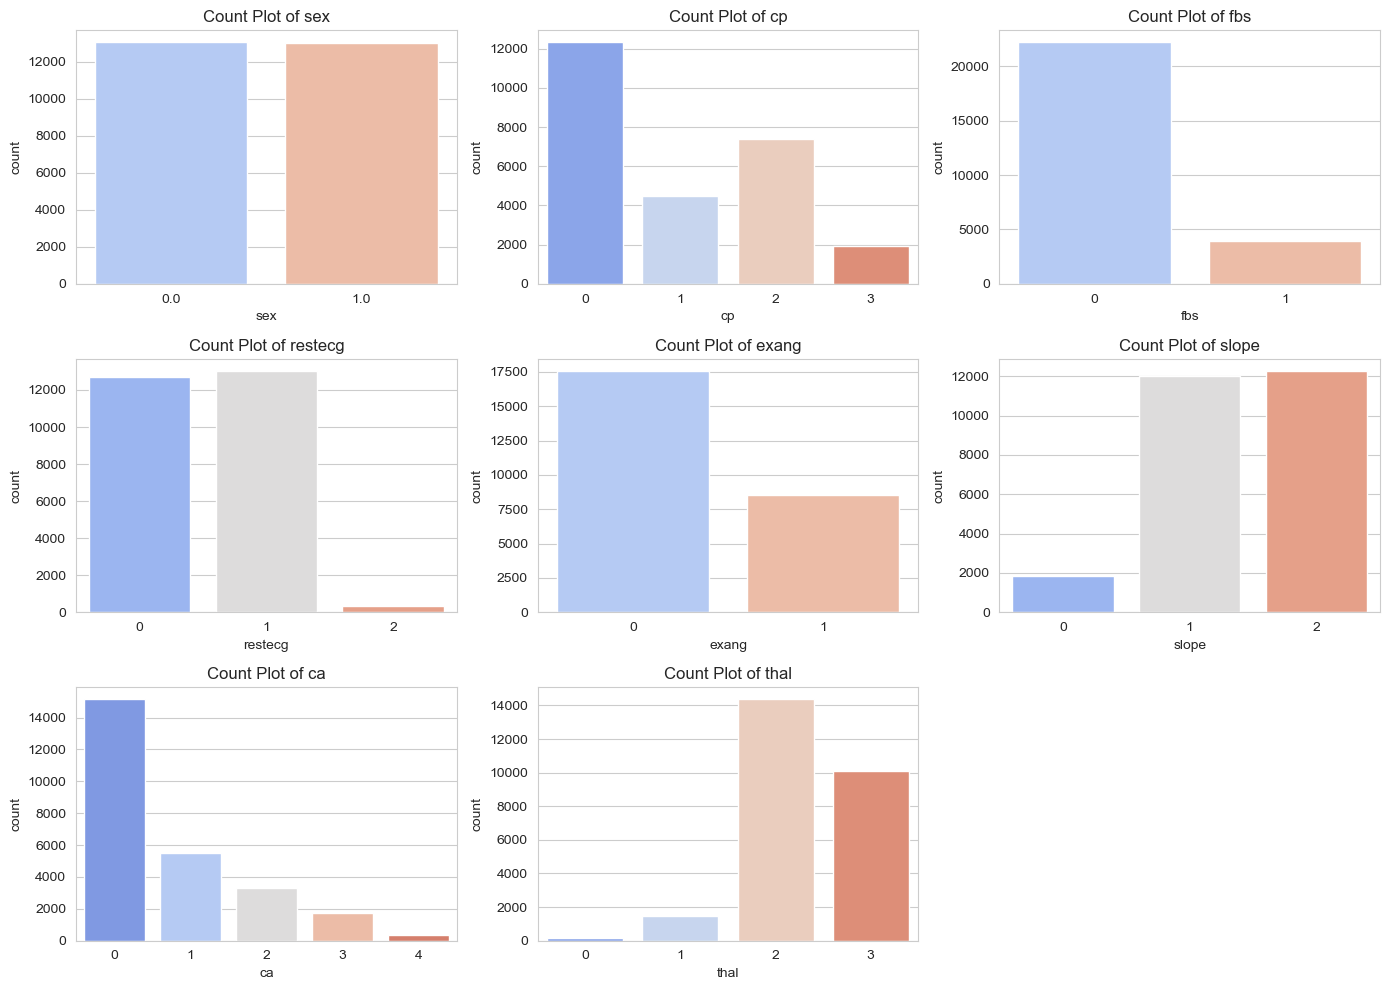

In [27]:
plt.figure(figsize = (14,10))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data = df, x = col, palette="coolwarm")
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

## <div style="font-family: Trebuchet MS; background-color: rgb(53, 0, 138); color: #FFFFFF; padding: 12px; line-height: 1.5;"> Heatmap 🔥</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 Below is <b>correlation map/heatmap of numerical variables</b> to show correlation level/values for each variables with others.
</div>

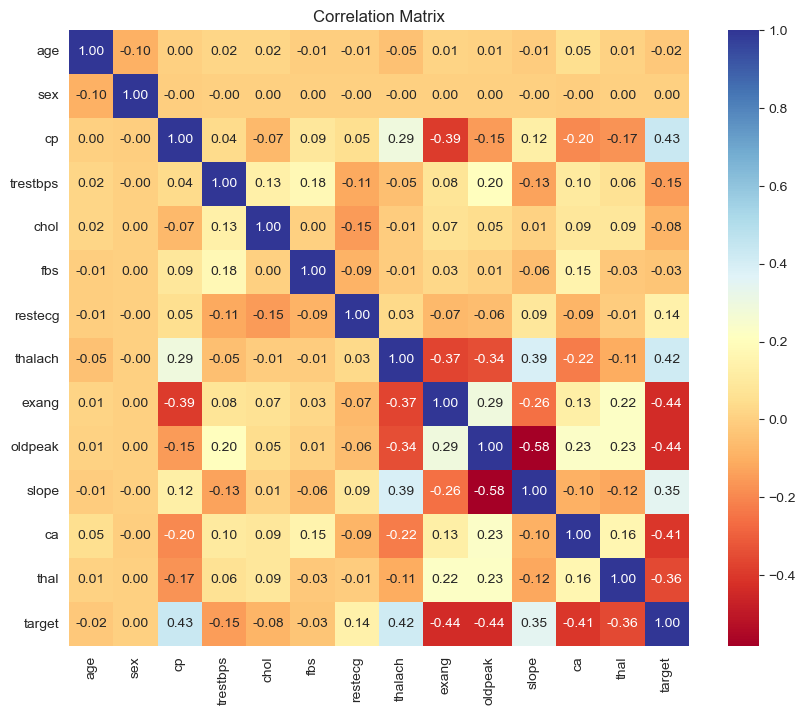

In [28]:
plt.figure(figsize =(10,8))
corr_matrix = df.select_dtypes(include=['number']).corr() 
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="RdYlBu")
plt.title("Correlation Matrix")
plt.show()

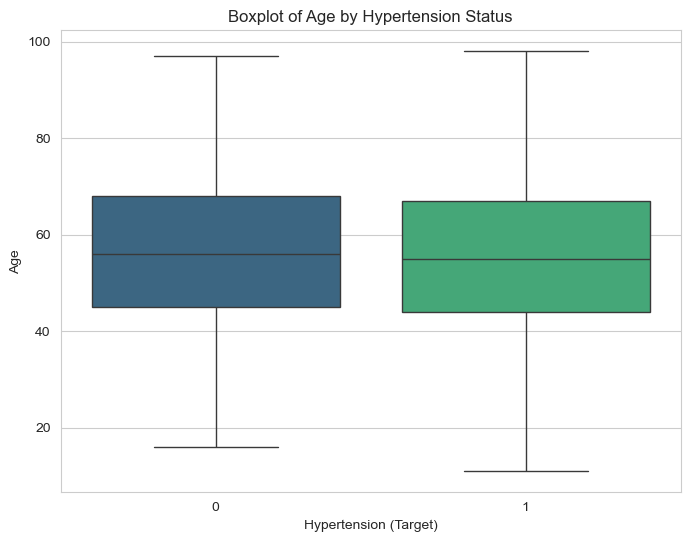

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(data = df, x = 'target',y = 'age', palette = "viridis")
plt.title("Boxplot of Age by Hypertension Status")
plt.xlabel("Hypertension (Target)")
plt.ylabel("Age")
plt.show()

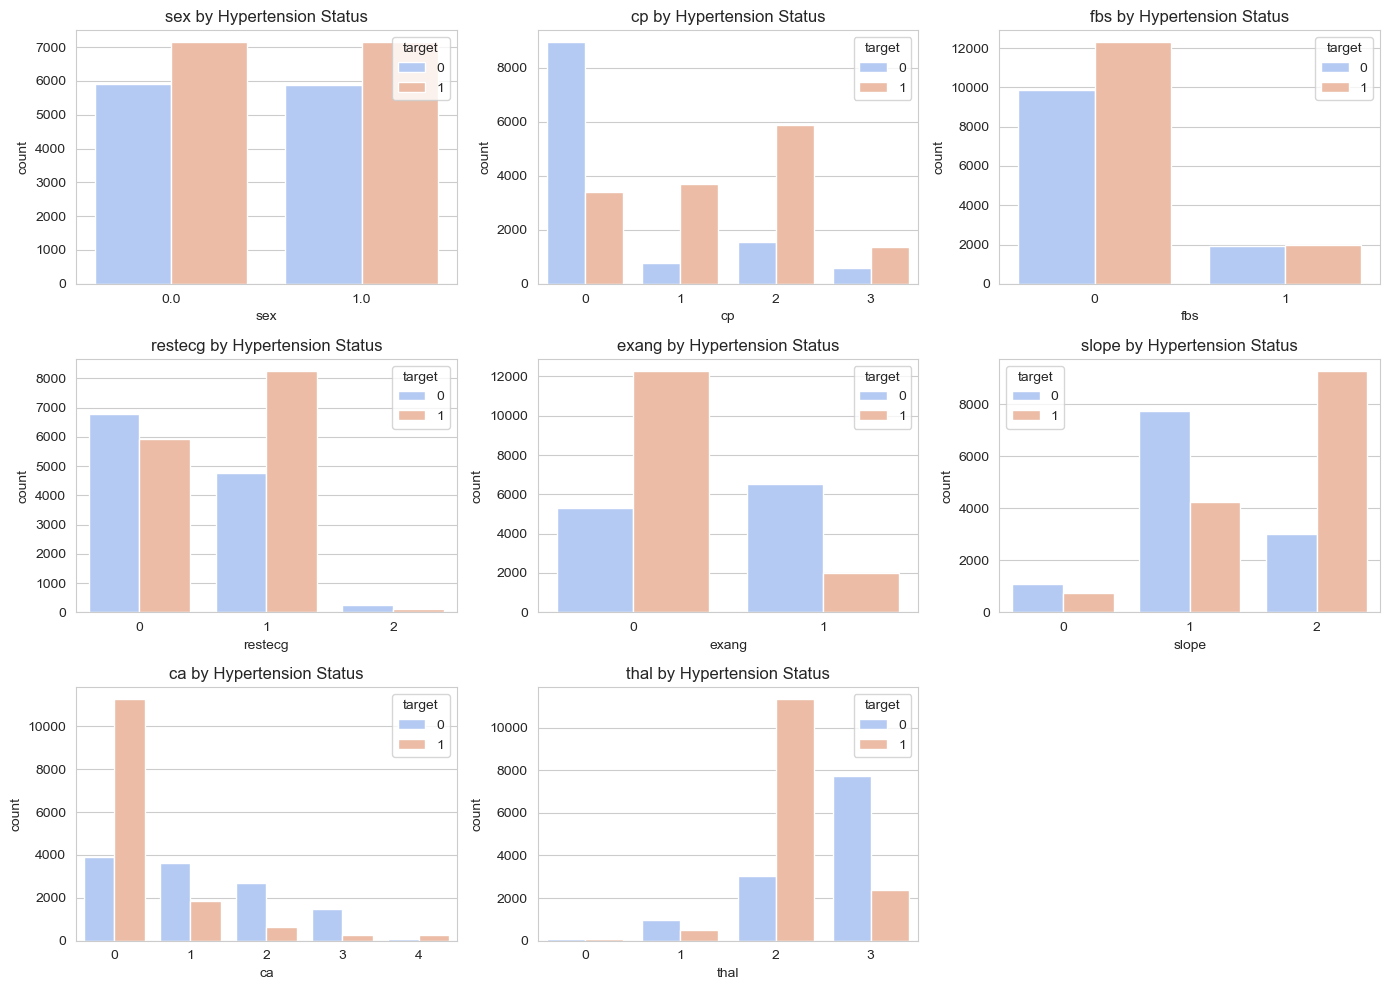

In [30]:
plt.figure(figsize = (14,10))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data = df, x = col,hue='target', palette="coolwarm")
    plt.title(f"{col} by Hypertension Status")
plt.tight_layout()
plt.show()

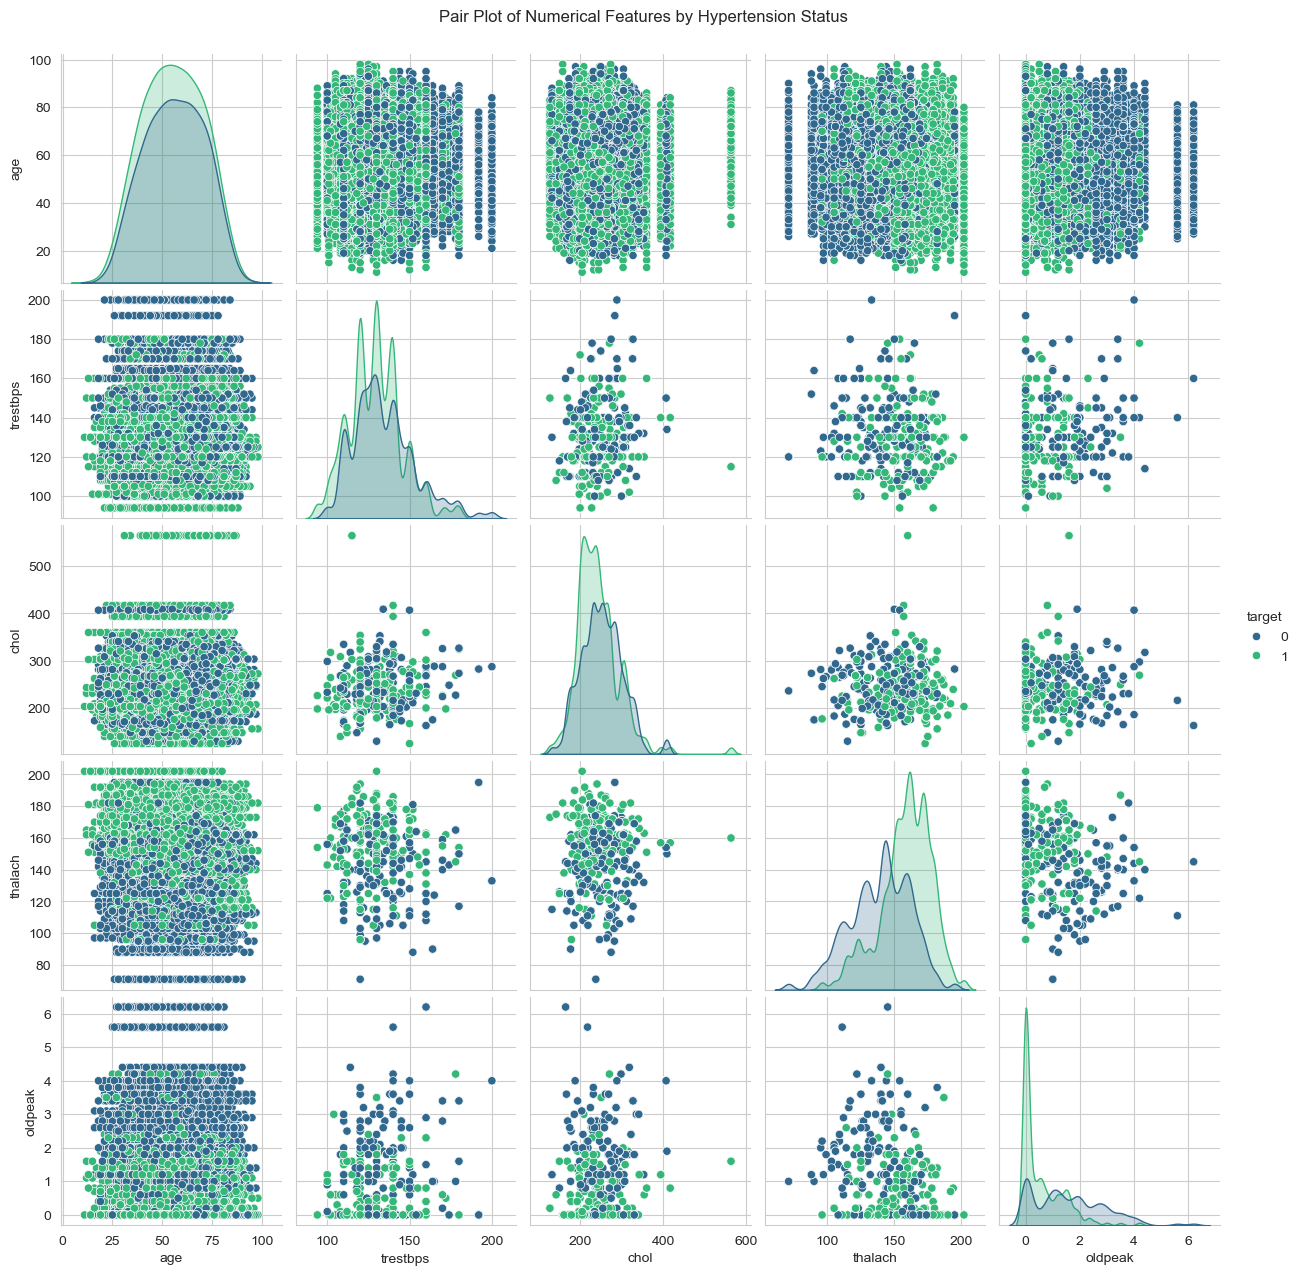

In [31]:
sns.pairplot(df,vars = numerical_features,hue = 'target',palette = "viridis")
plt.suptitle("Pair Plot of Numerical Features by Hypertension Status", y = 1.02)
plt.show()

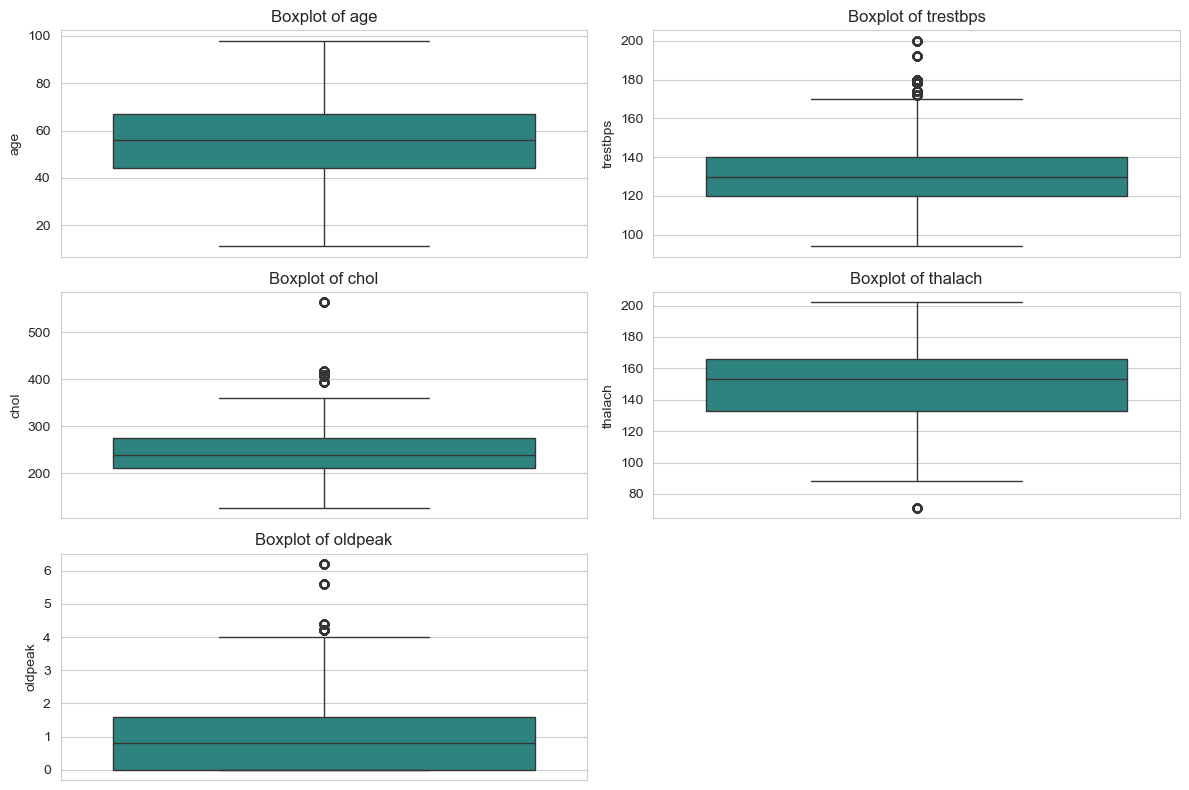

In [32]:
plt.figure(figsize=(12,8))
for i , col in enumerate(numerical_features,1):
    plt.subplot(3,2,i)
    sns.boxplot(data = df, y = col, palette = "viridis")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

## <div style="font-family: Trebuchet MS; background-color: rgb(53, 0, 138); color: #FFFFFF; padding: 12px; line-height: 1.5;"> Outliers </div>



In [33]:
outlier_columns = []
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        outlier_columns.append(col)

print("Columns with potential outliers:",outlier_columns)
print(df.shape) 

Columns with potential outliers: ['trestbps', 'chol', 'thalach', 'oldpeak']
(26083, 14)


In [34]:
for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    

In [35]:
print("Missing values:\n",df.isnull().sum())

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [36]:
corr = df.corr()
print(corr['target'].sort_values(ascending = False))

target      1.000000
thalach     0.421723
cp          0.419270
slope       0.331004
restecg     0.170582
sex         0.001161
age        -0.025091
fbs        -0.031686
chol       -0.104432
trestbps   -0.115305
thal       -0.362561
ca         -0.394481
exang      -0.435151
oldpeak    -0.442078
Name: target, dtype: float64


## <div style="font-family: Trebuchet MS; background-color: rgb(53, 0, 138); color: #FFFFFF; padding: 12px; line-height: 1.5;"> Features Separating ➗</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 In this section, <mark><b>the 'target' (dependent) column will be seperated</b></mark> from independent columns.
</div>

In [37]:
# --- Seperating Dependent Features ---
X = df.drop('target',axis = 1)
y = df['target']

## <div style="font-family: Trebuchet MS; background-color: rgb(53, 0, 138); color: #FFFFFF; padding: 12px; line-height: 1.5;"> Data Scaling 🔧</div>

In [38]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [39]:
# --- Display New Data Frame ---
df.head().style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'})

## <div style="font-family: Trebuchet MS; background-color: rgb(53, 0, 138); color: #FFFFFF; padding: 12px; line-height: 1.5;"> Splitting the Dataset 🪓</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The dataset will be splitted into <mark><b>80:20 ratio</b></mark> (80% training and 20% testing).
</div>

In [40]:
# --- Splitting Dataset into 80:20 ---
X_train , X_test,y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state=42)

# <div style="font-family: Trebuchet MS; background-color: rgb(53, 0, 138); color: #FFFFFF; padding: 12px; line-height: 1.5;">Model Implementation 🛠</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will implement various machine learning models as mentioned in <b>Introduction</b> section. In addition, explanation for each models will be discussed.
</div>

## <div style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;"> Logistic Regression</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    <blockquote style="color: #000000;">
    <mark><b>Logistic regression</b></mark> is a statistical method that is used for building machine learning models where <b>the dependent variable is dichotomous: i.e. binary</b>. Logistic regression is used to describe data and <b>the relationship between one dependent variable and one or more independent variables</b>. The independent variables can be nominal, ordinal, or of interval type.<br><br>
    The name "logistic regression" is derived from the concept of the logistic function that it uses. <b>The logistic function is also known as the sigmoid function</b>. The value of this logistic function lies between zero and one.<br><br>
    <center>
    <img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/years-2.JPG" alt="Logistic Regression" width="40%"><br>
    <i>🖼 Logistic Function by Simplilearn</i>
    </center>
    </blockquote>
</div>

In [43]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
lr_pred = logistic_model.predict(X_test)

logistic_accuracy = accuracy_score(y_test,lr_pred)

print(f'train score {logistic_model.score(X_train,y_train)}')
print(f'test score {logistic_model.score(X_test,y_test)}')
print("Accuracy:",accuracy_score(y_test,lr_pred))
print("\nClassification Report:\n", classification_report(y_test,lr_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,lr_pred))
print("recall",recall_score(y_test,lr_pred))
print('precision',precision_score(y_test,lr_pred))
print('f1_score',f1_score(y_test,lr_pred))
print('r2_score',r2_score(y_test,lr_pred))
pd.DataFrame({'True_values':y_test, 'pred_values':lr_pred})

train score 0.857646878355576
test score 0.8676891615541922
Accuracy: 0.8676891615541922

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.77      0.83      2095
           1       0.85      0.94      0.89      2795

    accuracy                           0.87      4890
   macro avg       0.88      0.86      0.86      4890
weighted avg       0.87      0.87      0.87      4890


Confusion Matrix:
 [[1617  478]
 [ 169 2626]]
recall 0.9395348837209302
precision 0.8460051546391752
f1_score 0.8903203932869977
r2_score 0.4596846567984938


True_values  pred_values
22198            1            1
9448             0            1
22470            0            0
5701             1            1
8913             1            1
...            ...          ...
1827             1            1
20304            0            0
23249            1            0
15884            0            0
19521            1            1

[4890 rows x 2 columns]

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Logistic Regression - 87% acc</b></p>
</div>

## <div style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;"> Support Vector Machine (SVM)</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    <blockquote style="color: #000000;">
    <mark><b>Support Vector Machine (SVM)</b></mark> is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.<br><br>
    The goal of the SVM algorithm is <b>to create the best line or decision boundary that can segregate n-dimensional space into classes</b> so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.<br><br>
        SVM chooses the <b>extreme points/vectors</b> that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.<br>
    <center>
    <img src="https://d2jdgazzki9vjm.cloudfront.net/tutorial/machine-learning/images/support-vector-machine-algorithm.png" alt="SVM" width="40%"><br>
    <i>🖼 SVM by JavaTPoint</i>
    </center>
    </blockquote>
</div>

In [44]:
# Initialize and train the SVM model
svm_model = SVC(kernel = 'rbf', random_state=42)
svm_model.fit(X_train,y_train)

svm_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test,svm_pred)

print(f'train score {svm_model.score(X_train,y_train)}')
print(f'test score {svm_model.score(X_test,y_test)}')
print("Accuracy:",accuracy_score(y_test,svm_pred))
print("\nClassification Report:\n", classification_report(y_test,svm_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,svm_pred))
print("recall",recall_score(y_test,svm_pred))
print('precision',precision_score(y_test,svm_pred))
print('f1_score',f1_score(y_test,svm_pred))
print('r2_score',r2_score(y_test,svm_pred))
pd.DataFrame({'True_values':y_test, 'pred_values':svm_pred})

train score 0.9909495321368308
test score 0.9881390593047035
Accuracy: 0.9881390593047035

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2095
           1       0.99      0.99      0.99      2795

    accuracy                           0.99      4890
   macro avg       0.99      0.99      0.99      4890
weighted avg       0.99      0.99      0.99      4890


Confusion Matrix:
 [[2063   32]
 [  26 2769]]
recall 0.9906976744186047
precision 0.9885755087468762
f1_score 0.9896354538956398
r2_score 0.9515636941179484


True_values  pred_values
22198            1            1
9448             0            0
22470            0            0
5701             1            1
8913             1            1
...            ...          ...
1827             1            1
20304            0            0
23249            1            1
15884            0            0
19521            1            1

[4890 rows x 2 columns]

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | SVM - 99% acc</b></p>
</div>

## <div style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;"> K-Nearest Neighbour (KNN)</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    <blockquote style="color: #000000;">
    <mark><b>The k-nearest neighbors (KNN)</b></mark> algorithm is a data classification method <b>for estimating the likelihood that a data point will become a member of one group or another</b> based on what group the data points nearest to it belong to.<br><br>
    The k-nearest neighbor algorithm is a type of supervised machine learning algorithm used <b>to solve classification and regression problems</b>.<br><br>
    It's called a <b>lazy learning algorithm or lazy learner</b> because it doesn't perform any training when you supply the training data. Instead, it just stores the data during the training time and doesn't perform any calculations. It doesn't build a model until a query is performed on the dataset. This makes KNN ideal for data mining.</b></mark>.<br><br>
    <center>
    <img src="https://1.bp.blogspot.com/-D6REhf2XBwQ/XZcWn0cwSEI/AAAAAAAAAvs/LUCN8jxvzcMjkkDK4FAXSuR7MBDW8SBJgCLcBGAsYHQ/s1600/KNN_final_a1mrv9.jpg" alt="KNN" width="35%"><br>
    <i>🖼 KNN by Kita Informatika</i>
    </center>
    </blockquote>
</div>

In [46]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train,y_train)

knn_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test,knn_pred)

print(f'train score {knn_model.score(X_train,y_train)}')
print(f'test score {knn_model.score(X_test,y_test)}')
print("Accuracy:",accuracy_score(y_test,knn_pred))
print("\nClassification Report:\n", classification_report(y_test,knn_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,knn_pred))
print("recall",recall_score(y_test,knn_pred))
print('precision',precision_score(y_test,knn_pred))
print('f1_score',f1_score(y_test,knn_pred))
print('r2_score',r2_score(y_test,knn_pred))
pd.DataFrame({'True_values':y_test, 'pred_values':knn_pred})

train score 1.0
test score 1.0
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2095
           1       1.00      1.00      1.00      2795

    accuracy                           1.00      4890
   macro avg       1.00      1.00      1.00      4890
weighted avg       1.00      1.00      1.00      4890


Confusion Matrix:
 [[2095    0]
 [   0 2795]]
recall 1.0
precision 1.0
f1_score 1.0
r2_score 1.0


True_values  pred_values
22198            1            1
9448             0            0
22470            0            0
5701             1            1
8913             1            1
...            ...          ...
1827             1            1
20304            0            0
23249            1            1
15884            0            0
19521            1            1

[4890 rows x 2 columns]

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | KNearest Neighbors - 100% acc</b></p>
</div>

## <div style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;"> Grid Search KNN</div>

In [47]:
knn_mode = KNeighborsClassifier()

param_grid = {'n_neighbors' : [5,6,7,8,9,10,11,12,13,20]}

In [48]:
grid_search = GridSearchCV(estimator=knn_model, param_grid = param_grid)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 20]})

In [49]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'n_neighbors': 5}
Best Score:  1.0


In [50]:
knn_grid_model = grid_search.best_estimator_

knn_grid_pred = knn_grid_model.predict(X_test)
knn_grid_accuracy = accuracy_score(y_test,knn_grid_pred)

print(f'train score {knn_grid_model.score(X_train,y_train)}')
print(f'test score {knn_grid_model.score(X_test,y_test)}')
print("Accuracy:",accuracy_score(y_test,knn_grid_pred))
print("\nClassification Report:\n", classification_report(y_test,knn_grid_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,knn_grid_pred))
print("recall",recall_score(y_test,knn_grid_pred))
print('precision',precision_score(y_test,knn_grid_pred))
print('f1_score',f1_score(y_test,knn_grid_pred))
print('r2_score',r2_score(y_test,knn_grid_pred))
pd.DataFrame({'True_values':y_test, 'pred_values':knn_grid_pred})

train score 1.0
test score 1.0
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2095
           1       1.00      1.00      1.00      2795

    accuracy                           1.00      4890
   macro avg       1.00      1.00      1.00      4890
weighted avg       1.00      1.00      1.00      4890


Confusion Matrix:
 [[2095    0]
 [   0 2795]]
recall 1.0
precision 1.0
f1_score 1.0
r2_score 1.0


True_values  pred_values
22198            1            1
9448             0            0
22470            0            0
5701             1            1
8913             1            1
...            ...          ...
1827             1            1
20304            0            0
23249            1            1
15884            0            0
19521            1            1

[4890 rows x 2 columns]

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | KNN Grid Search - 100% acc</b></p>
</div>

## <div style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;">Artificial Neural Network (ANN)</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    <blockquote style="color: #000000;">
    <mark><b>Artificial Neural Network (ANN)</b></mark> <span> contain artificial neurons, which are called </span><b><strong>units</strong></b><span>. These units are arranged in a series of layers that together constitute the whole </span><b><strong>Artificial Neural Network</strong></b><span> in a system. A layer can have only a dozen units or millions of units</span><b><strong>,</strong></b><span> as this depends on how the complex neural networks will be required to learn the hidden patterns in the dataset. Commonly, </span><b><strong>an </strong></b><span>Artificial Neural Network has an input layer, an output layer, as well as hidden layers. The input layer receives data from the outside world</span><b><strong>,</strong></b><span> which the neural network needs to analyze or learn about. Then, this data passes through one or multiple hidden layers that transform the input into data that is valuable for the output layer. Finally, the output layer provides an output in the form of a response of the </span><b><strong>Artificial Neural Networks </strong></b><span>to the input data provided. </span>
    <span>
    In the majority of neural networks, units are interconnected from one layer to another. Each of these connections has weights that determine the influence of one unit on another unit. As the data transfers from one unit to another, the neural network learns more and more about the data, which eventually results in an output from the output layer. 
    </span>
    <center>
    <img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20230602113310/Neural-Networks-Architecture.png" alt="ANN" width="35%"><br>
    <i>🖼 ANN by geeksforgeeks</i>
    </center>
    </blockquote>
</div>

In [51]:
ann_model = MLPClassifier(hidden_layer_sizes = (100,50), max_iter = 500, random_state = 42)
ann_model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [52]:
mlp_predictions = ann_model.predict(X_test)

ann_accuracy = accuracy_score(y_test,mlp_predictions)

print(f'train score {ann_model.score(X_train,y_train)}')
print(f'test score {ann_model.score(X_test,y_test)}')
print("Accuracy:",accuracy_score(y_test,mlp_predictions))
print("\nClassification Report:\n", classification_report(y_test,mlp_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,mlp_predictions))
print("recall",recall_score(y_test,mlp_predictions))
print('precision',precision_score(y_test,mlp_predictions))
print('f1_score',f1_score(y_test,mlp_predictions))
print('r2_score',r2_score(y_test,mlp_predictions))
pd.DataFrame({'True_values':y_test, 'pred_values':mlp_predictions})

train score 1.0
test score 1.0
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2095
           1       1.00      1.00      1.00      2795

    accuracy                           1.00      4890
   macro avg       1.00      1.00      1.00      4890
weighted avg       1.00      1.00      1.00      4890


Confusion Matrix:
 [[2095    0]
 [   0 2795]]
recall 1.0
precision 1.0
f1_score 1.0
r2_score 1.0


True_values  pred_values
22198            1            1
9448             0            0
22470            0            0
5701             1            1
8913             1            1
...            ...          ...
1827             1            1
20304            0            0
23249            1            1
15884            0            0
19521            1            1

[4890 rows x 2 columns]

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | ANN - 100% acc</b></p>
</div>

## <div style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;">Random Forest</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    <blockquote style="color: #000000;">
    <mark><b>Random Forest</b></mark> is a tree-based machine learning algorithm that <b>leverages the power of multiple decision trees for making decisions</b>. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. <b>A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models</b>.<br>
    <center>
    <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png" alt="RF" width="35%"><br>
    <i>🖼 Random Forest by Abhishek Sharma</i>
    </center>
    </blockquote>
</div>

In [53]:
rf_model = RandomForestClassifier(n_estimators=200, min_samples_leaf=2)
rf_model.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=200)

In [54]:
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_pred)

print(f'train score {rf_model.score(X_train,y_train)}')
print(f'test score {rf_model.score(X_test,y_test)}')
print("Accuracy:",accuracy_score(y_test,rf_pred))
print("\nClassification Report:\n", classification_report(y_test,rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,rf_pred))
print("recall",recall_score(y_test,rf_pred))
print('precision',precision_score(y_test,rf_pred))
print('f1_score',f1_score(y_test,rf_pred))
print('r2_score',r2_score(y_test,rf_pred))
pd.DataFrame({'True_values':y_test, 'pred_values':rf_pred})

train score 1.0
test score 1.0
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2095
           1       1.00      1.00      1.00      2795

    accuracy                           1.00      4890
   macro avg       1.00      1.00      1.00      4890
weighted avg       1.00      1.00      1.00      4890


Confusion Matrix:
 [[2095    0]
 [   0 2795]]
recall 1.0
precision 1.0
f1_score 1.0
r2_score 1.0


True_values  pred_values
22198            1            1
9448             0            0
22470            0            0
5701             1            1
8913             1            1
...            ...          ...
1827             1            1
20304            0            0
23249            1            1
15884            0            0
19521            1            1

[4890 rows x 2 columns]

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Random Forest - 100% acc</b></p>
</div>

## <div style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;"> Grid Search Random Forest</div>

In [55]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators' : [50,100,200],
    'max_depth' : [None,10,20,30],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4] ,
    'max_features' : ['auto','sqrt','log2'],
    'bootstrap' : [True,False]
}

In [56]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,n_jobs= -1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [57]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score:  1.0


In [58]:
rf_grid_model = grid_search.best_estimator_
rf_grid_pred = rf_grid_model.predict(X_test)
rf_grid_accuracy = accuracy_score(y_test,rf_grid_pred)

print(f'train score {rf_grid_model.score(X_train,y_train)}')
print(f'test score {rf_grid_model.score(X_test,y_test)}')
print("Accuracy:",accuracy_score(y_test,rf_grid_pred))
print("\nClassification Report:\n", classification_report(y_test,rf_grid_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,rf_grid_pred))
print("recall",recall_score(y_test,rf_grid_pred))
print('precision',precision_score(y_test,rf_grid_pred))
print('f1_score',f1_score(y_test,rf_grid_pred))
print('r2_score',r2_score(y_test,rf_grid_pred))
pd.DataFrame({'True_values':y_test, 'pred_values':rf_grid_pred})

train score 1.0
test score 1.0
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2095
           1       1.00      1.00      1.00      2795

    accuracy                           1.00      4890
   macro avg       1.00      1.00      1.00      4890
weighted avg       1.00      1.00      1.00      4890


Confusion Matrix:
 [[2095    0]
 [   0 2795]]
recall 1.0
precision 1.0
f1_score 1.0
r2_score 1.0


True_values  pred_values
22198            1            1
9448             0            0
22470            0            0
5701             1            1
8913             1            1
...            ...          ...
1827             1            1
20304            0            0
23249            1            1
15884            0            0
19521            1            1

[4890 rows x 2 columns]

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Random Forest Grid Search - 100% acc</b></p>
</div>

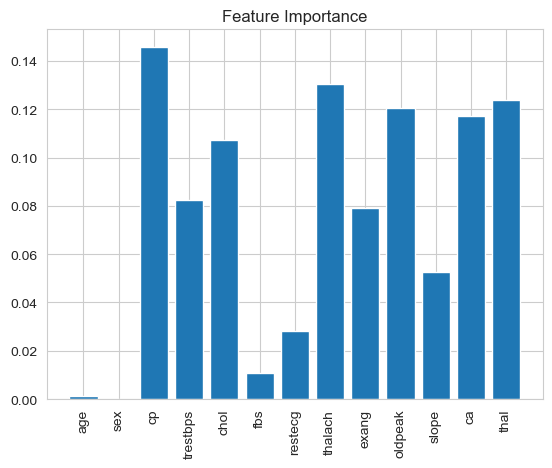

In [59]:
importance = rf_grid_model.feature_importances_
plt.bar(df.drop('target',axis = 1).columns, importance)
plt.title("Feature Importance")
plt.xticks(rotation = 90)
plt.show()

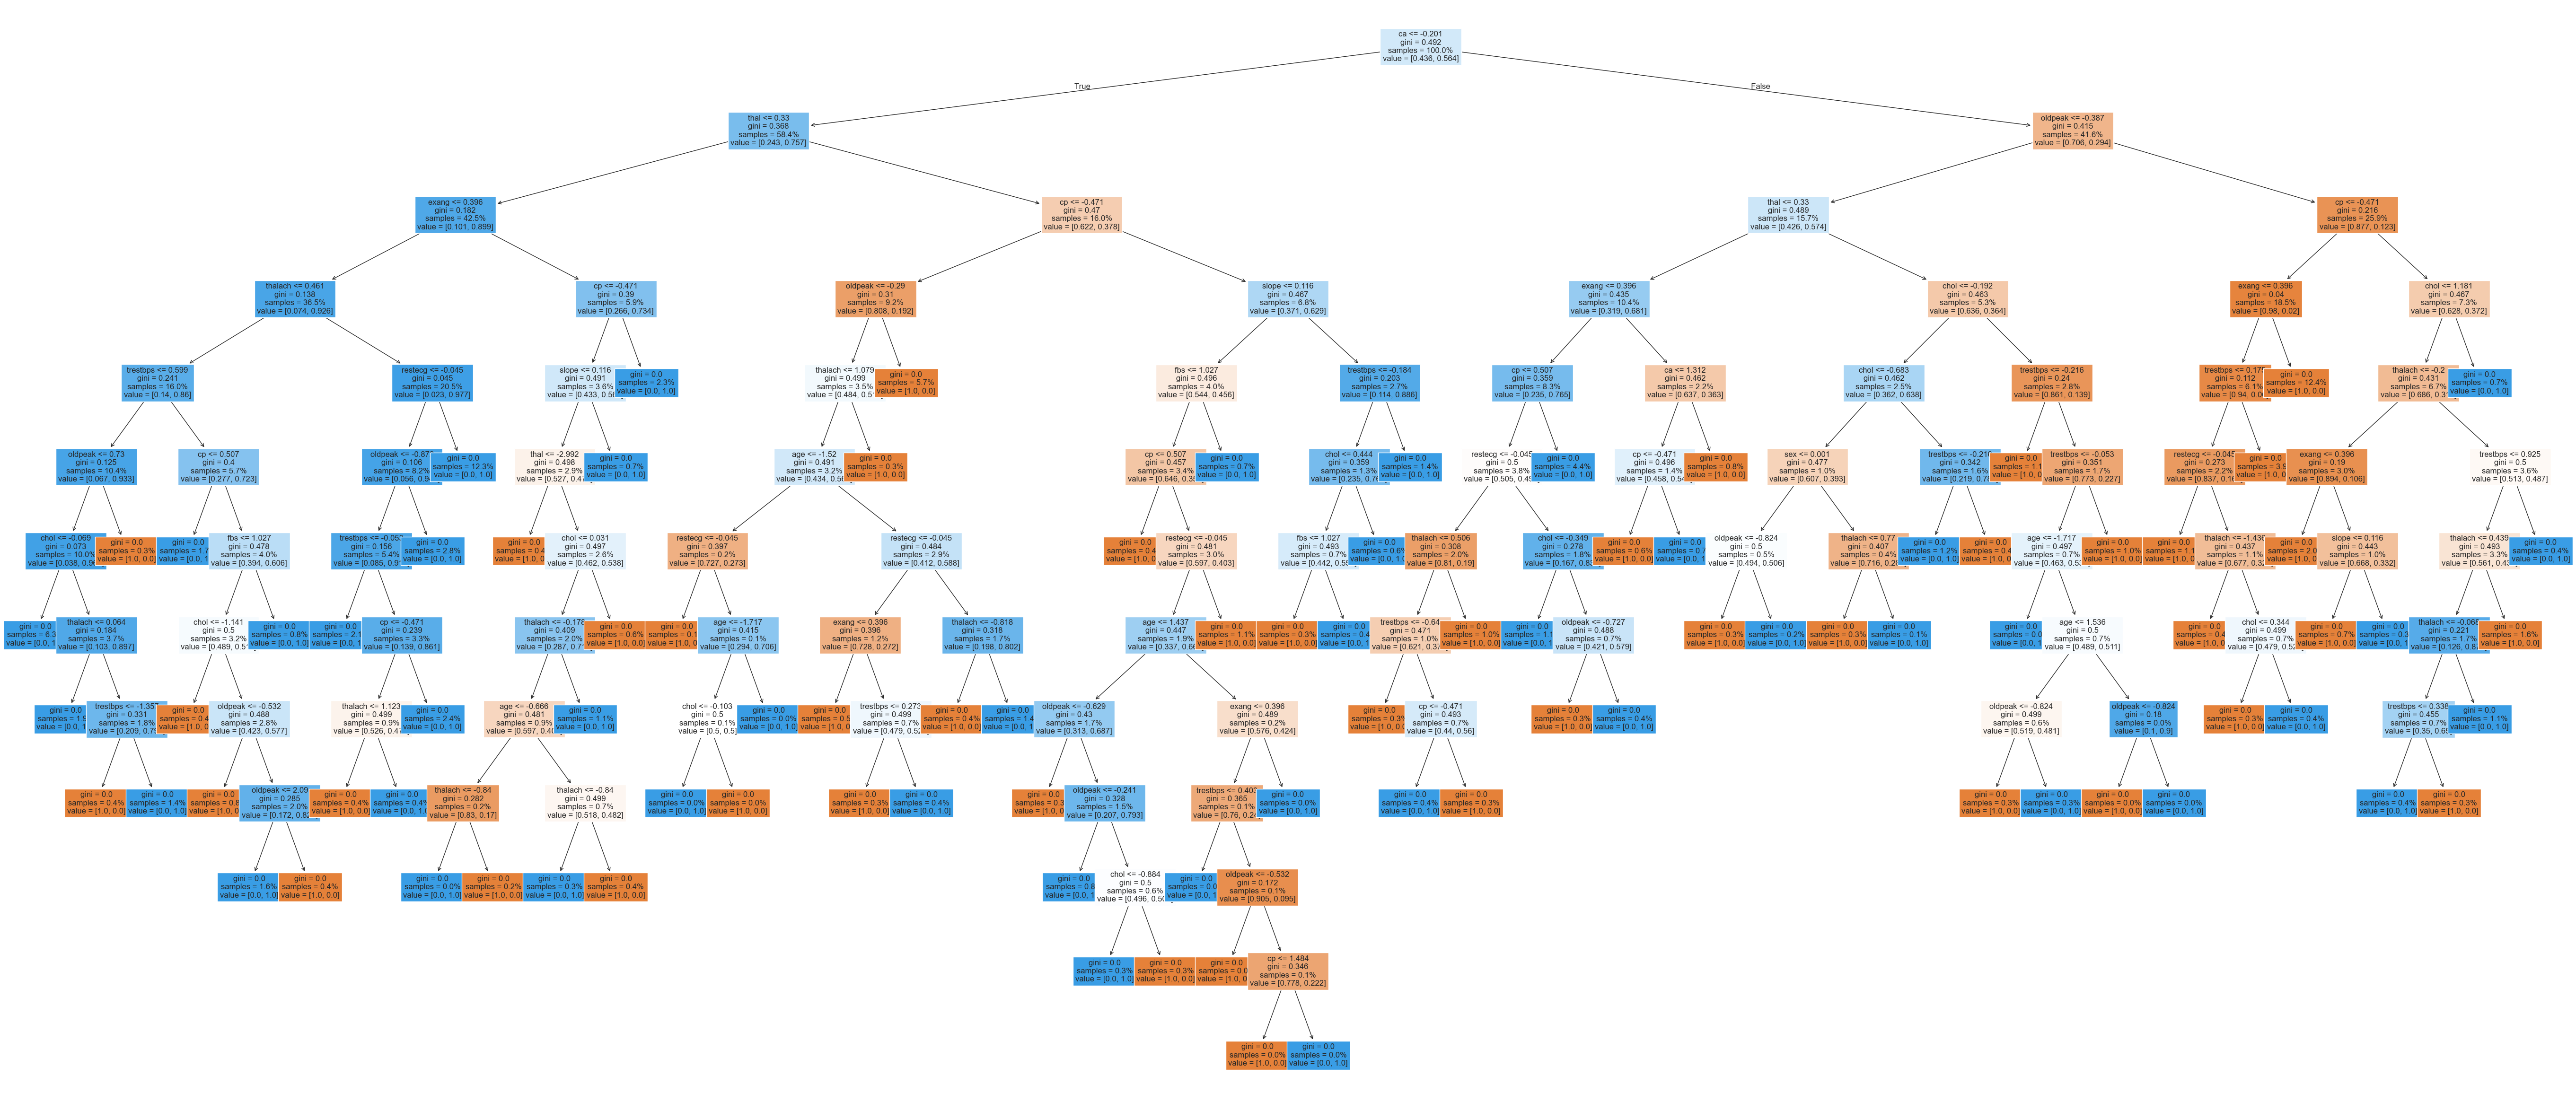

In [60]:
plt.figure(figsize = (70,30))
plot_tree(rf_grid_model.estimators_[0], feature_names = df.drop(['target'],axis = 1).columns, filled = True, fontsize = 12 , proportion= True)
plt.show()

## <div style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;"> Model Comparison 👀</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 After implementing 10 models, this section will <b>compare machine learning models</b>.
</div>

In [61]:
# Store model names and accuracies in lists 
model_names = ['logistic_model' , 'svm_model', 'knn_model',
               'knn_grid_model', 'ann_model', 'rf_model', 'rf_grid_model']

accuracies = [logistic_accuracy, svm_accuracy, knn_accuracy,
              knn_grid_accuracy, ann_accuracy, rf_accuracy, rf_grid_accuracy]

# Plot with Plotly
fig = go.Figure(data = [go.Bar(x = model_names , y = accuracies, text = [f"{acc:.2f}" for acc in accuracies],
                              textposition='auto', marker_color = 'skyblue')])

# Add titles 
fig.update_layout(title="Model Accuracy Comparison",
                  xaxis_title="Models", yaxis_title="Accuracy",
                  template="plotly_white")

# Show the plot
fig.show()

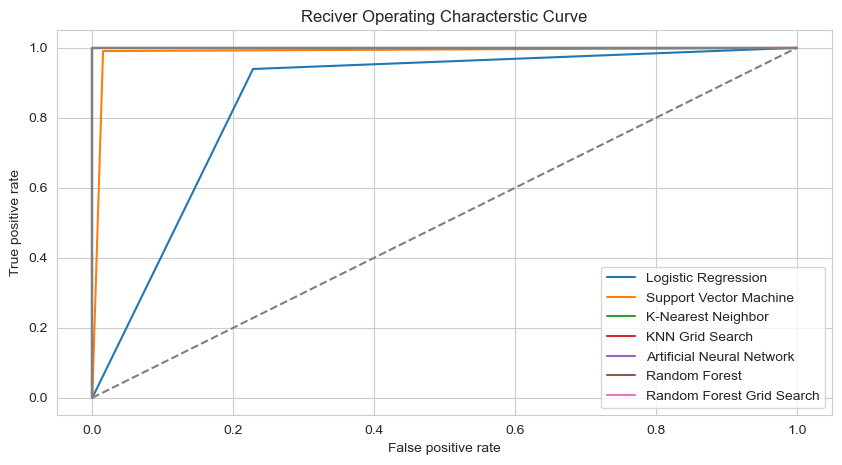

In [62]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_pred)
svm_false_positive_rate,svm_true_positive_rate,svm_threshold = roc_curve(y_test,svm_pred)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_pred)
knn_grid_false_positive_rate,knn_grid_true_positive_rate,knn_grid_threshold = roc_curve(y_test,knn_grid_pred)
ann_false_positive_rate,ann_true_positive_rate,ann_threshold = roc_curve(y_test,mlp_predictions)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_pred)
rf_grid_false_positive_rate,rf_grid_true_positive_rate,rf_grid_threshold = roc_curve(y_test,rf_grid_pred)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(svm_false_positive_rate,svm_true_positive_rate,label='Support Vector Machine')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(knn_grid_false_positive_rate,knn_grid_true_positive_rate,label='KNN Grid Search')
plt.plot(ann_false_positive_rate,ann_true_positive_rate,label='Artificial Neural Network')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(rf_grid_false_positive_rate,rf_grid_true_positive_rate,label='Random Forest Grid Search')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [63]:
joblib.dump(rf_model,"model.pkl")

['model.pkl']

<div style='font-size:200%;'>
    <a id='import'></a>
    <h3 style='color: orange; font-weight: bold; font-family: Cascadia code;'>
        <center> Alright, that's it folks, Thank you for the visit! </center>
    </h3>
</div>